In [1]:
import requests
import pandas as pd
import json
from bokeh.plotting import figure, output_notebook, show, save, output_file
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.arima_model import ARIMA, ARMA
from scipy.signal import lfilter
from scipy import stats
from statsmodels.graphics.api import qqplot
from scipy import fftpack

%matplotlib inline

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Download and load the data from json files

In [2]:
r = requests.get('https://www.openhumans.org/api/public-data/?source=fitbit')

In [3]:
url = 'https://www.openhumans.org/data-management/datafile-download/27709/'

In [4]:
r1 = requests.get(url)

In [2]:
with open('fitbit-data-3.json') as json_data:        #Open json file containing the data
    fit_data_0 = json.load(json_data)
    

In [3]:
fit_data_0['profile']

{'averageDailySteps': 0,
 'encodedId': '265VRZ',
 'height': 64.01574803149606,
 'memberSince': '2013-06-17',
 'strideLengthRunning': 43.503937007874015,
 'strideLengthWalking': 26.5748031496063,
 'weight': 142.3}

In [4]:
fit_data_0.keys()

dict_keys(['sleep-minutes', 'awake-minutes', 'sleep-start-time', 'profile', 'activities-overview', 'minutes-to-sleep', 'weight-log', 'sleep-awakenings', 'heart', 'tracker-minutes-fairly-active', 'sleep-minutes-after-wakeup', 'tracker-minutes-very-active', 'tracker-minutes-sedentary', 'time-in-bed', 'sleep-efficiency', 'tracker-steps', 'tracker-calories', 'tracker-distance', 'tracker-activity-calories', 'tracker-elevation', 'tracker-floors', 'weight', 'tracker-minutes-lightly-active'])

In [5]:
fit_data_0['weight-log']['2013-08']['weight']

[{'bmi': 22.17,
  'date': '2013-08-01',
  'fat': 12.977999687194824,
  'logId': 1375333987000,
  'source': 'Aria',
  'time': '05:13:07',
  'weight': 129.2},
 {'bmi': 21.9,
  'date': '2013-08-02',
  'fat': 13.069999694824219,
  'logId': 1375419848000,
  'source': 'Aria',
  'time': '05:04:08',
  'weight': 127.6},
 {'bmi': 21.92,
  'date': '2013-08-03',
  'fat': 13.145999908447266,
  'logId': 1375512164000,
  'source': 'Aria',
  'time': '06:42:44',
  'weight': 127.7},
 {'bmi': 22.06,
  'date': '2013-08-04',
  'fat': 13.3149995803833,
  'logId': 1375588101000,
  'source': 'Aria',
  'time': '03:48:21',
  'weight': 128.5},
 {'bmi': 21.9,
  'date': '2013-08-05',
  'fat': 13.234000205993652,
  'logId': 1375675608000,
  'source': 'Aria',
  'time': '04:06:48',
  'weight': 127.6},
 {'bmi': 22.07,
  'date': '2013-08-06',
  'fat': 13.454999923706055,
  'logId': 1375765434000,
  'source': 'Aria',
  'time': '05:03:54',
  'weight': 128.6},
 {'bmi': 22.19,
  'date': '2013-08-07',
  'fat': 13.3120002746

# Data for Minutes active. Here we will get data for years 2013 through 2017 for activity

In [7]:


min_light_active_2013 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2013']['activities-tracker-minutesLightlyActive'])
min_light_active_2013['dateTime'] = pd.to_datetime(min_light_active_2013['dateTime'])
min_light_active_2013.columns = ['date','light_minutes']
min_light_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2014']['activities-tracker-minutesLightlyActive'])
min_light_active_2014['dateTime'] = pd.to_datetime(min_light_active_2014['dateTime'])
min_light_active_2014.columns = ['date','light_minutes']
min_light_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2015']['activities-tracker-minutesLightlyActive'])
min_light_active_2015['dateTime'] = pd.to_datetime(min_light_active_2015['dateTime'])
min_light_active_2015.columns = ['date','light_minutes']
min_light_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2016']['activities-tracker-minutesLightlyActive'])
min_light_active_2016['dateTime'] = pd.to_datetime(min_light_active_2016['dateTime'])
min_light_active_2016.columns = ['date','light_minutes']
min_light_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2017']['activities-tracker-minutesLightlyActive'])
min_light_active_2017['dateTime'] = pd.to_datetime(min_light_active_2017['dateTime'])
min_light_active_2017.columns = ['date','light_minutes']

concatenate to make one DataFrame for lighly active minutes 

In [8]:


min_light_active = pd.concat([min_light_active_2013,min_light_active_2014,min_light_active_2015,min_light_active_2016,min_light_active_2017])
#min_light_active = min_light_active.set_index('date')
min_light_active['light_minutes'] = min_light_active['light_minutes'].astype(int)



Repeat steps for fairly active minutes

In [9]:


min_fairly_active_2013 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2013']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2013['dateTime'] = pd.to_datetime(min_fairly_active_2013['dateTime'])
min_fairly_active_2013.columns = ['date','fair_minutes']
min_fairly_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2014']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2014['dateTime'] = pd.to_datetime(min_fairly_active_2014['dateTime'])
min_fairly_active_2014.columns = ['date','fair_minutes']
min_fairly_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2015']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2015['dateTime'] = pd.to_datetime(min_fairly_active_2015['dateTime'])
min_fairly_active_2015.columns = ['date','fair_minutes']
min_fairly_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2016']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2016['dateTime'] = pd.to_datetime(min_fairly_active_2016['dateTime'])
min_fairly_active_2016.columns = ['date','fair_minutes']
min_fairly_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2017']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2017['dateTime'] = pd.to_datetime(min_fairly_active_2017['dateTime'])
min_fairly_active_2017.columns = ['date','fair_minutes']


In [10]:
min_fairly_active = pd.concat([min_fairly_active_2013,min_fairly_active_2014,min_fairly_active_2015,min_fairly_active_2016,min_fairly_active_2017])
#min_fairly_active = min_fairly_active.set_index('date')
min_fairly_active['fair_minutes'] = min_fairly_active['fair_minutes'].astype(int)
min_fairly_active = min_fairly_active.drop('date',axis=1)

Repeat all steps for very active minutes

In [11]:

min_very_active_2013 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2013']['activities-tracker-minutesVeryActive'])
min_very_active_2013['dateTime'] = pd.to_datetime(min_very_active_2013['dateTime'])
min_very_active_2013.columns = ['date','very_minutes']
min_very_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2014']['activities-tracker-minutesVeryActive'])
min_very_active_2014['dateTime'] = pd.to_datetime(min_very_active_2014['dateTime'])
min_very_active_2014.columns = ['date','very_minutes']
min_very_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2015']['activities-tracker-minutesVeryActive'])
min_very_active_2015['dateTime'] = pd.to_datetime(min_very_active_2015['dateTime'])
min_very_active_2015.columns = ['date','very_minutes']
min_very_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2016']['activities-tracker-minutesVeryActive'])
min_very_active_2016['dateTime'] = pd.to_datetime(min_very_active_2016['dateTime'])
min_very_active_2016.columns = ['date','very_minutes']
min_very_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2017']['activities-tracker-minutesVeryActive'])
min_very_active_2017['dateTime'] = pd.to_datetime(min_very_active_2017['dateTime'])
min_very_active_2017.columns = ['date','very_minutes']

In [12]:
min_very_active = pd.concat([min_very_active_2013, min_very_active_2014,min_very_active_2015,min_very_active_2016,min_very_active_2017])
#min_very_active = min_very_active.set_index('date')
min_very_active['very_minutes'] = min_very_active['very_minutes'].astype(int)
min_very_active = min_very_active.drop('date',axis=1)


Combine all above minutes, make new colum for total active minutes and a ratio. Set index to datetime

In [13]:

min_active_total = pd.concat([min_light_active, min_fairly_active, min_very_active], axis=1)
min_active_total['Total_minutes'] = min_active_total['light_minutes']+min_active_total['fair_minutes']+min_active_total['very_minutes']
min_active_total['Percent Very Active'] = (min_active_total['very_minutes']/min_active_total['Total_minutes'])
#min_active_total = min_active_total.reset_index()

In [14]:
min_active_total = min_active_total.reset_index(drop=True)
min_active_total = min_active_total[183:1308]
min_active_total_date = min_active_total.set_index('date')
min_active_total_date

light_minutes  fair_minutes  very_minutes  Total_minutes  \
date                                                                   
2013-07-03            126            45             3            174   
2013-07-04             88            37             0            125   
2013-07-05             11             7             0             18   
2013-07-06            105            40             5            150   
2013-07-07            148            44             0            192   
2013-07-08            184            59             1            244   
2013-07-09             78            23             0            101   
2013-07-10            111            31             0            142   
2013-07-11            133            55             2            190   
2013-07-12             97            32             0            129   
2013-07-13             97            21             0            118   
2013-07-14            125            40             0            165   
2013-07-15            145            36             0            181   
2013-07-16            205            53             1            259   
2013-07-17            150            56            11            217   
2013-07-18            121            74            30            225   
2013-07-19            116            18             0            134   
2013-07-20            186            46             0            232   
2013-07-21            157            52             4            213   
2013-07-22            131            42             0            173   
2013-07-23            177            24             1            202   
2013-07-24            100            35             0            135   
2013-07-25            125            26             0            151   
2013-07-26            121            28             0            149   
2013-07-27             68            15             0             83   
2013-07-28            189            60             1            250   
2013-07-29             92            24             0            116   
2013-07-30             81            30             0            111   
2013-07-31             82            36             2            120   
2013-08-01            104            22             0            126   
...                   ...           ...           ...            ...   
2016-07-02            123             0             0            123   
2016-07-03            106             0             0            106   
2016-07-04             93             0             0             93   
2016-07-05            102             0             0            102   
2016-07-06            154             0             0            154   
2016-07-07            108             0             0            108   
2016-07-08            121             0             0            121   
2016-07-09             96             0             0             96   
2016-07-10            170             0             0            170   
2016-07-11            172             0             0            172   
2016-07-12            110             6             1            117   
2016-07-13            151             0             0            151   
2016-07-14             62             0             0             62   
2016-07-15            176             0             0            176   
2016-07-16            151             0             0            151   
2016-07-17            150            38            19            207   
2016-07-18            214             0             0            214   
2016-07-19            141             0             0            141   
2016-07-20            160             0             0            160   
2016-07-21            150             0             0            150   
2016-07-22            134             0             0            134   
2016-07-23             90             0             0             90   
2016-07-24              0             0             

Lag and Autocorrelation plot for time series data of total minutes

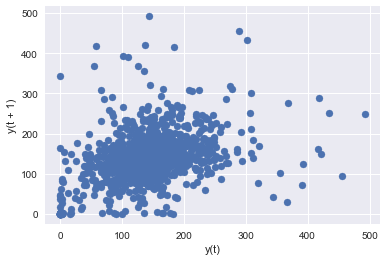

In [15]:
from pandas.plotting import lag_plot
lag_plot(min_active_total_date['Total_minutes'])
plt.show()

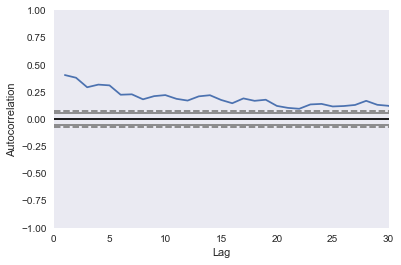

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(min_active_total_date['Total_minutes'])
plt.xlim(0,30)
plt.show()

# Now get weight and body fat data into a DataFrame:

In [18]:
df_weight = pd.DataFrame()
for key in fit_data_0['weight-log']:
    data = pd.DataFrame(fit_data_0['weight-log'][key]['weight'])
    df_weight = df_weight.append(data)

In [19]:
df_weight['date']= pd.to_datetime(df_weight['date'])

In [20]:
df_weight = df_weight.sort_values(by='date')
df_weight = df_weight.drop_duplicates(subset='date', keep='last')
df_weight = df_weight.reset_index(drop=True)


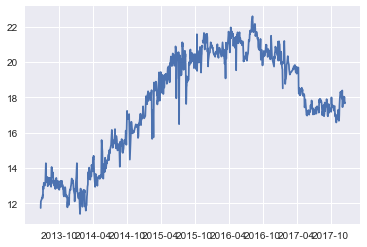

In [21]:
plt.plot(df_weight['date'],df_weight['fat'])
plt.show()

In [22]:
df_weight_red = df_weight.loc[8:809]
df_weight_red = df_weight_red.reset_index(drop=True)
df_weight_red_date = df_weight_red.set_index('date')

Consider the first differenced time series of weight and body fat. Here we also study the correlation between these two first differenced time series 

In [23]:
df_weight_red_date['Diff fat'] = df_weight_red_date['fat'].diff()

In [24]:
df_weight_red_date['Diff weight'] = df_weight_red_date['weight'].diff()

In [25]:
for i in range(-10,10,1):
    print('shift day:', i, df_weight_red_date['Diff weight'].loc['2013-07-04':].corr(
        df_weight_red_date['Diff fat'].loc['2013-07-04':].shift(i))) 

shift day: -10 -0.0569931062522
shift day: -9 -0.0242161869781
shift day: -8 0.024969171639
shift day: -7 -0.00630123457166
shift day: -6 0.0254832535542
shift day: -5 0.0263251308574
shift day: -4 -0.0268439088521
shift day: -3 0.0430838520253
shift day: -2 -0.0461120849242
shift day: -1 0.0488563675578
shift day: 0 -0.0360826921386
shift day: 1 0.026370852636
shift day: 2 0.0294217388362
shift day: 3 0.00711624973191
shift day: 4 -0.00449193527824
shift day: 5 -0.0207524848902
shift day: 6 -0.00941456674915
shift day: 7 -0.0212270368564
shift day: 8 0.0548874493396
shift day: 9 -0.0245892723114


# Consider forecasts of weight as a superivsed learning problem by creating new target variables which are shifted from the original by one day 

In [26]:
df_weight_new = df_weight_red_date

In [27]:
df_weight_new['shifted_weight'] = df_weight_new['weight'].shift(-1)

In [28]:
df_weight_new = df_weight_new.dropna()

In [75]:
X = df_weight_new['weight'].values.reshape(-1,1)
y = df_weight_new['shifted_weight'].values.reshape(-1,1).ravel()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [77]:
size = int(len(X)*0.66)

In [78]:
X_train = X[:size]
X_test = X[size:]
y_train = y[:size]
y_test = y[size:]

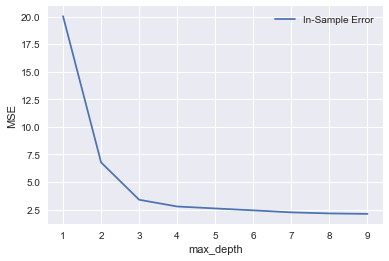

In [79]:
from sklearn import metrics

max_depths = range(1, 10)
in_sample_errors = []
for max_depth in max_depths:
    y_pred = RandomForestRegressor(max_depth=max_depth).fit(X, y).predict(X)
    in_sample_errors.append(metrics.mean_squared_error(y, y_pred))
    
plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right')

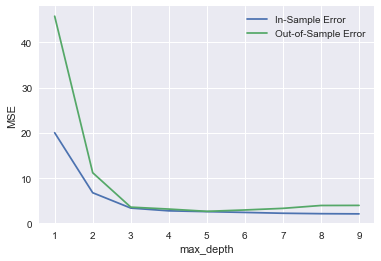

In [92]:
test_errors = []
for depth in max_depths:
    est = RandomForestRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred = est.predict(X_test)
    test_errors.append(metrics.mean_squared_error(y_test, y_pred))

plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.plot(max_depths, test_errors, label='Out-of-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.savefig('Error_1.png')

In [88]:
best  = RandomForestRegressor(max_depth=4)
best.fit(X_train,y_train)
pred = best.predict(X_test)

In [89]:
d = {'time index': range(271), 'predictions': pred, 'test': y_test}

In [90]:
df_results = pd.DataFrame(data=d)

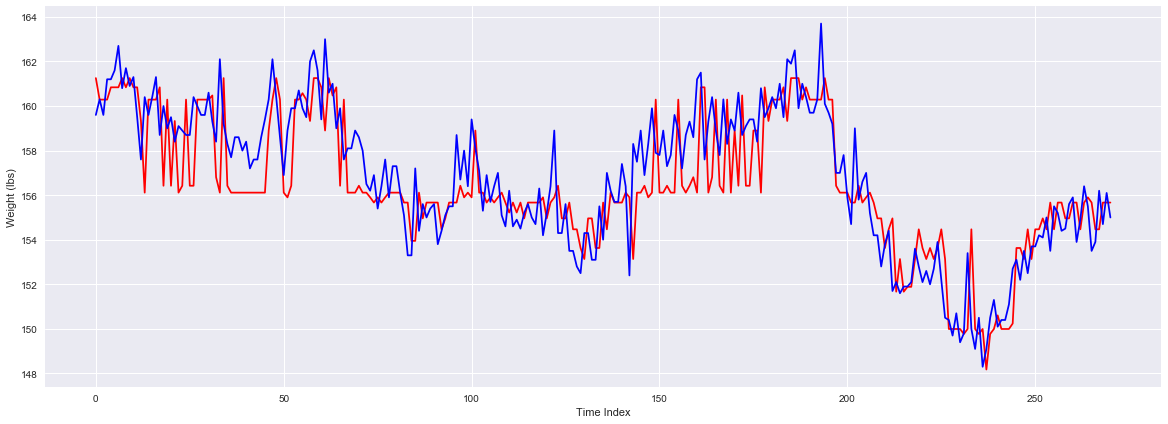

In [94]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_results.index,df_results['predictions'],'r')
plot2 = ax1.plot(df_results.index,df_results['test'], 'blue')
plt.xlabel("Time Index")
plt.ylabel('Weight (lbs)')
plt.savefig('RF_1.png')
plt.show()


Some information about the weight time series, lag plot and autocorrelation. Clearly this is not a stationary time series. Looked at fourier components with FFT. No indication of seaonal effects

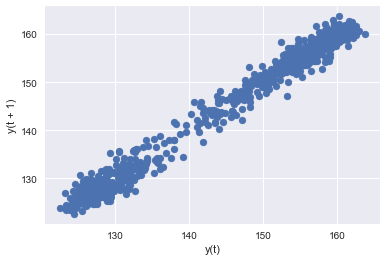

In [29]:
#Lag plot for weight data 

lag_plot(df_weight_red_date['weight'])
plt.show()

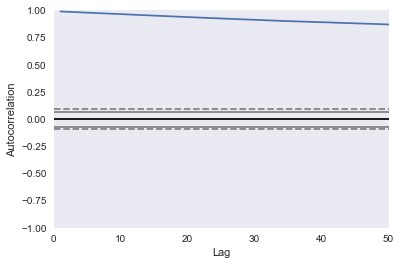

In [30]:
#Autocorrelation for weight data: not a stationary time series

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_weight_red_date['weight'])
plt.xlim(0,50)
plt.show()

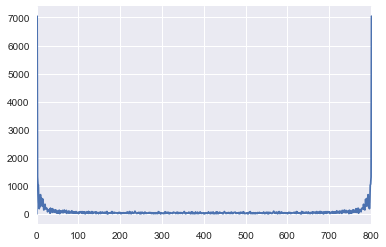

In [31]:
fft = fftpack.fft(df_weight_red_date['weight']- df_weight_red_date['weight'].mean())
plt.plot(np.abs(fft))
plt.xlim(0,801)
plt.show()

# Combine weight and activity data into one DataFrame

In [33]:
df_weight_active = pd.concat([df_weight_red_date,min_active_total_date],axis=1)
df_weight_active = df_weight_active.dropna()

In [34]:
#Calculate rolling averages for a 7 day period to smooth out the time series

df_weight_active['Rolling Avg Activity'] = df_weight_active['Total_minutes'].rolling(window=7).mean()
df_weight_active['Rolling Avg Weight'] = df_weight_active['weight'].rolling(window=7).mean()

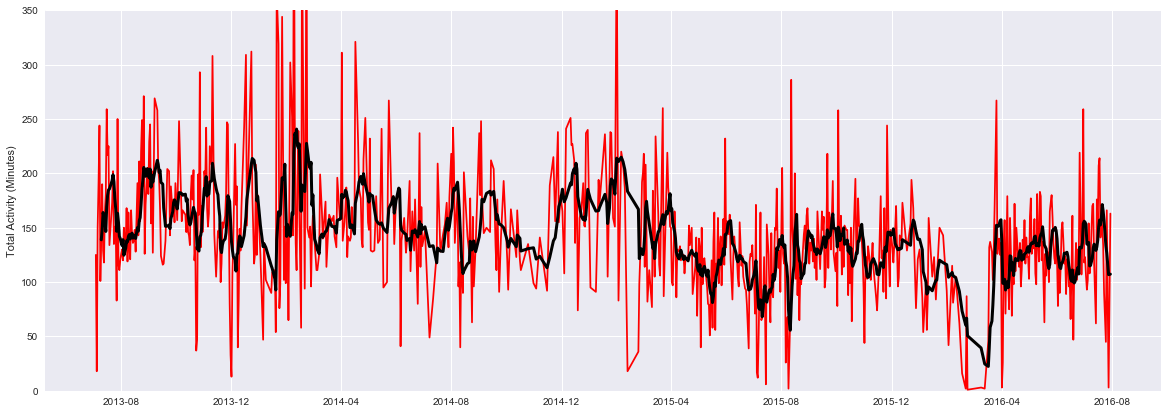

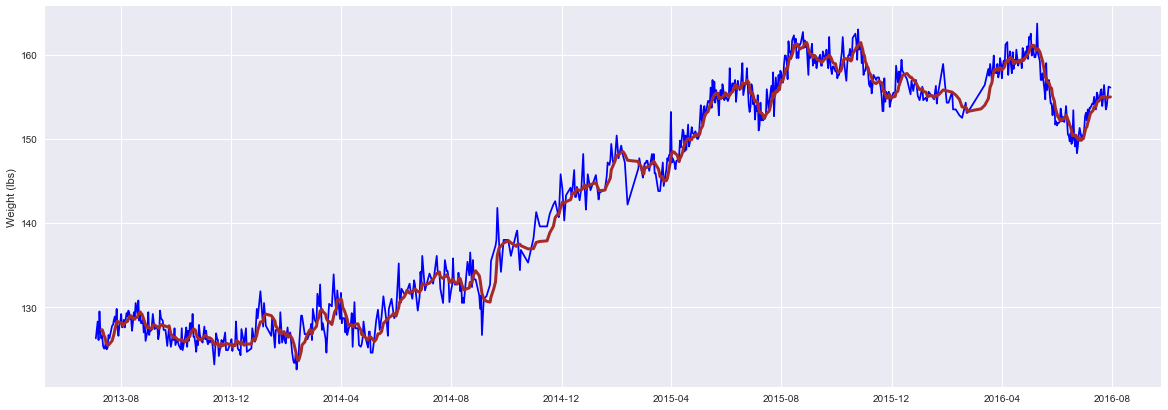

In [35]:
#Plots of data and the rolling averages , total activity and weight

fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_active.index,df_weight_active['Total_minutes'],'r')
plot2 = ax1.plot(df_weight_active.index,df_weight_active['Rolling Avg Activity'], 'black',linewidth=3.0)
plt.ylabel('Total Activity (Minutes)')
plt.ylim(0,350)
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_active.index,df_weight_active['weight'],'b')
plot4 = ax2.plot(df_weight_active.index,df_weight_active['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')


Consider the differenced weight and differenced total minutes time series

In [33]:
df_weight_active['Diff Total Minutes'] = df_weight_active['Total_minutes'].diff()
df_weight_active['Diff Weight'] = df_weight_active['weight'].diff()


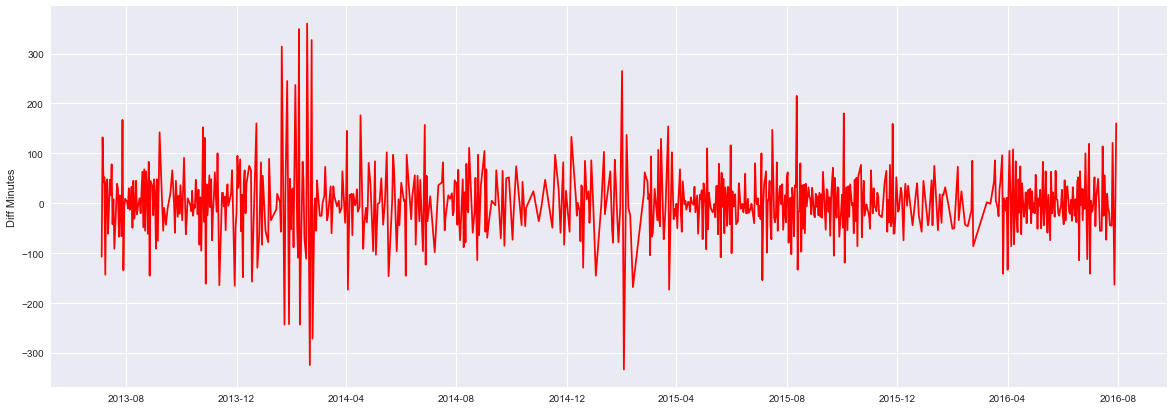

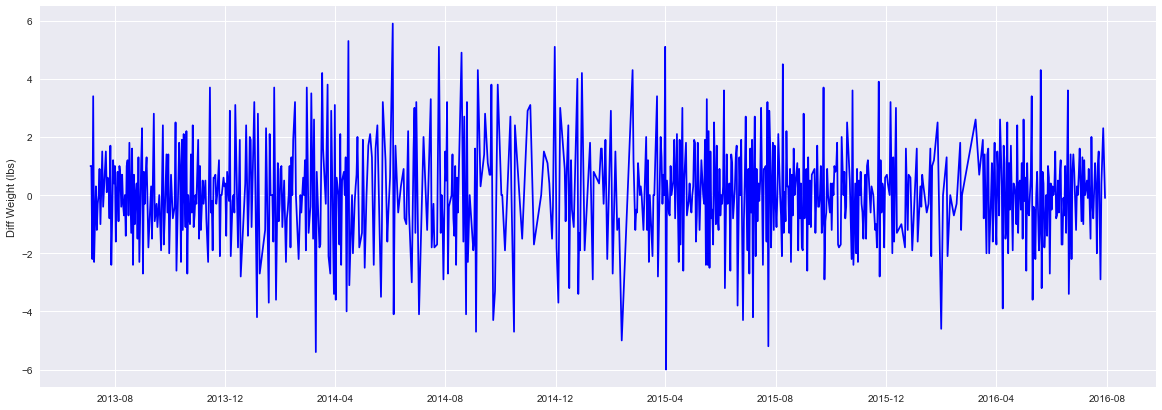

In [34]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_active.index,df_weight_active['Diff Total Minutes'],'r')
plt.ylabel('Diff Minutes')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_active.index,df_weight_active['Diff Weight'],'b')
plt.ylabel('Diff Weight (lbs)')

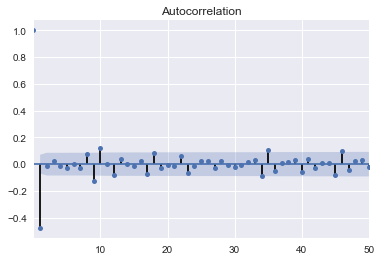

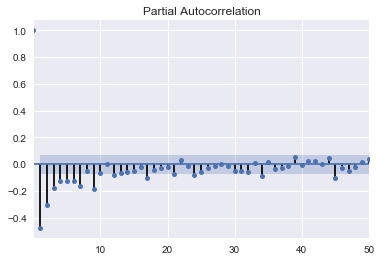

In [35]:
plot_acf(df_weight_active['Diff Total Minutes'].loc['2013-07-05':], lags=50)
plt.xlim(0.1,50)
plot_pacf(df_weight_active['Diff Total Minutes'].loc['2013-07-05':], lags=50)
plt.xlim(0.1,50)
plt.show()

In [ ]:
filter_act_new = (filter_act+df_weight_active['Diff Weight']).dropna()

In [ ]:
resid_act_new = resid_act.loc['2013-07-13':]

In [ ]:
for i in range(-10,10,1):
    print('shift day:', i, filter_act_new.corr(resid_act_new.shift(i)))  

In [38]:
df_weight_active['Rolling Change Activity'] = df_weight_active['Rolling Avg Activity'].pct_change(15)
df_weight_active['Rolling Change Weight'] = df_weight_active['Rolling Avg Weight'].pct_change(15)

In [39]:
#for i in range(-7,7,1):
 #   print('shift day:', i, df_weight_active['Rolling Change Weight'].corr(df_weight_active['Rolling Change Activity'].shift(i)))

In [40]:
#Correlation between total activity and weight, with various time lags 

for i in range(0,20,1):
    print('shift day:', i, df_weight_active['Rolling Avg Activity'].corr(df_weight_active['Rolling Avg Weight'].shift(i)))  

shift day: 0 -0.577347717488
shift day: 1 -0.577134057862
shift day: 2 -0.577505266496
shift day: 3 -0.57742711017
shift day: 4 -0.577528792696
shift day: 5 -0.578015106682
shift day: 6 -0.578412759632
shift day: 7 -0.579224213541
shift day: 8 -0.578811583119
shift day: 9 -0.577877331683
shift day: 10 -0.576674942466
shift day: 11 -0.574735223462
shift day: 12 -0.572524444983
shift day: 13 -0.570019459521
shift day: 14 -0.567410315289
shift day: 15 -0.565043062908
shift day: 16 -0.563162813545
shift day: 17 -0.562349014904
shift day: 18 -0.561459950842
shift day: 19 -0.56099929356


Plot of (raw) Weights versus Activity at the same times. Grouping into two clusters of data

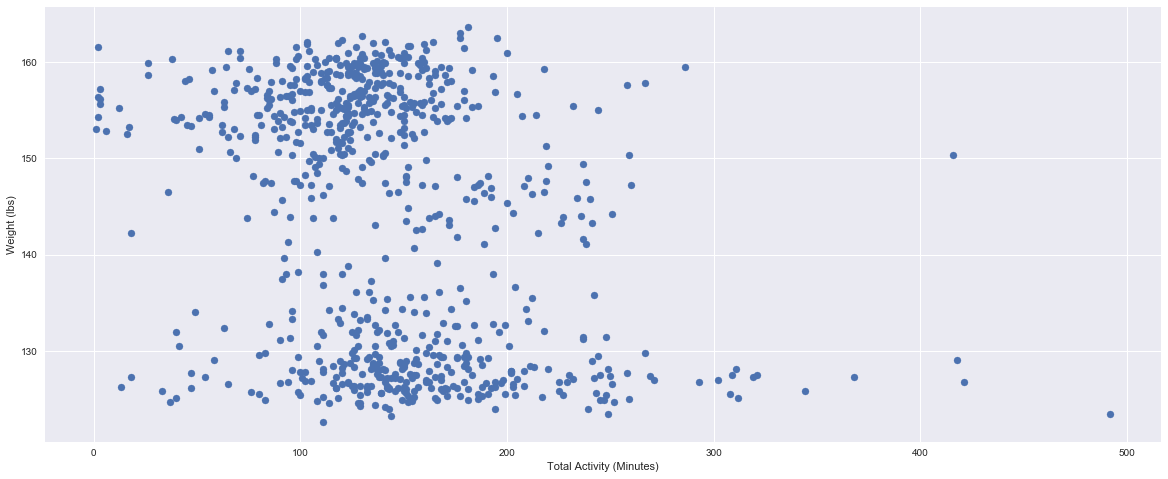

In [42]:

plt.figure(2,figsize=(20,8))
plt.scatter(df_weight_active['Total_minutes'],df_weight_active['weight'])
plt.xlabel('Total Activity (Minutes)')
plt.ylabel('Weight (lbs)')

Plot of Avg Weights versus Avg Total Activity at the same times. Shows that there is some clustering of data. More activity is correlated with less weight

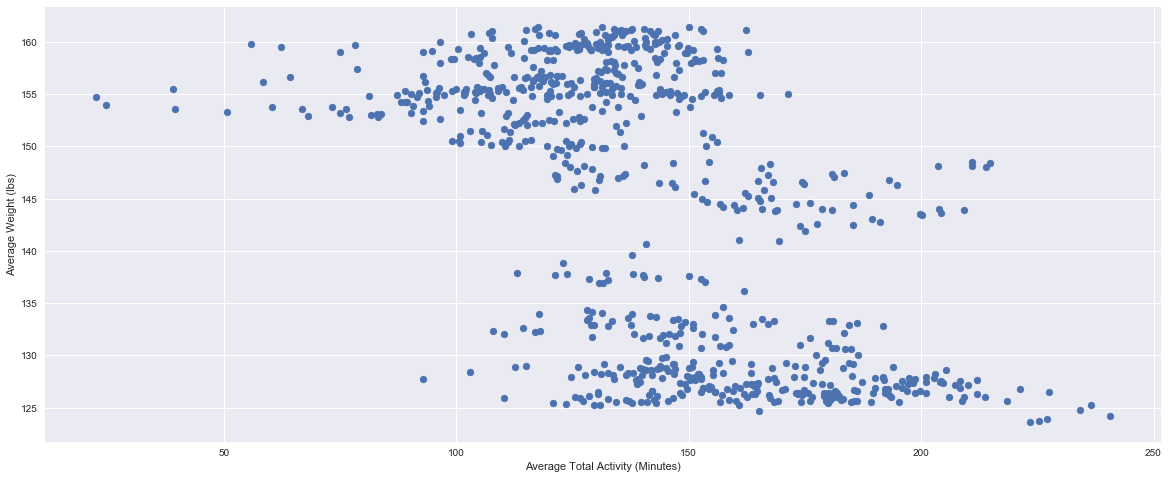

In [43]:


plt.figure(2,figsize=(20,8))
plt.scatter(df_weight_active['Rolling Avg Activity'],df_weight_active['Rolling Avg Weight'])
plt.xlabel('Average Total Activity (Minutes)')
plt.ylabel('Average Weight (lbs)')
    

# Weight and Data about Calories

Same procedure of taking data for calories and putting it together into a larger DataFrame 

In [39]:
tracker_cal_2013 = pd.DataFrame(fit_data_0['tracker-calories']['2013']['activities-tracker-calories'])
tracker_cal_2013['dateTime'] = pd.to_datetime(tracker_cal_2013['dateTime'])
tracker_cal_2013.columns = ['date','Tracker_Calories']
tracker_cal_2014 = pd.DataFrame(fit_data_0['tracker-calories']['2014']['activities-tracker-calories'])
tracker_cal_2014['dateTime'] = pd.to_datetime(tracker_cal_2014['dateTime'])
tracker_cal_2014.columns = ['date','Tracker_Calories']
tracker_cal_2015 = pd.DataFrame(fit_data_0['tracker-calories']['2015']['activities-tracker-calories'])
tracker_cal_2015['dateTime'] = pd.to_datetime(tracker_cal_2015['dateTime'])
tracker_cal_2015.columns = ['date','Tracker_Calories']
tracker_cal_2016 = pd.DataFrame(fit_data_0['tracker-calories']['2016']['activities-tracker-calories'])
tracker_cal_2016['dateTime'] = pd.to_datetime(tracker_cal_2016['dateTime'])
tracker_cal_2016.columns = ['date','Tracker_Calories']
tracker_cal_2017 = pd.DataFrame(fit_data_0['tracker-calories']['2017']['activities-tracker-calories'])
tracker_cal_2017['dateTime'] = pd.to_datetime(tracker_cal_2017['dateTime'])
tracker_cal_2017.columns = ['date','Tracker_Calories']

In [40]:
tracker_calories = pd.concat([tracker_cal_2013, tracker_cal_2014,tracker_cal_2015,tracker_cal_2016,tracker_cal_2017])
tracker_calories['Tracker_Calories'] = tracker_calories['Tracker_Calories'].astype(int)
tracker_calories = tracker_calories.reset_index(drop=True)
tracker_calories_red = tracker_calories[183:1309].reset_index(drop=True)

In [41]:
tracker_act_cal_2013 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2013']['activities-tracker-activityCalories'])
tracker_act_cal_2013['dateTime'] = pd.to_datetime(tracker_act_cal_2013['dateTime'])
tracker_act_cal_2013.columns = ['date','Tracker_Act_Calories']
tracker_act_cal_2014 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2014']['activities-tracker-activityCalories'])
tracker_act_cal_2014['dateTime'] = pd.to_datetime(tracker_act_cal_2014['dateTime'])
tracker_act_cal_2014.columns = ['date','Tracker_Act_Calories']
tracker_act_cal_2015 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2015']['activities-tracker-activityCalories'])
tracker_act_cal_2015['dateTime'] = pd.to_datetime(tracker_act_cal_2015['dateTime'])
tracker_act_cal_2015.columns = ['date','Tracker_Act_Calories']
tracker_act_cal_2016 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2016']['activities-tracker-activityCalories'])
tracker_act_cal_2016['dateTime'] = pd.to_datetime(tracker_act_cal_2016['dateTime'])
tracker_act_cal_2016.columns = ['date','Tracker_Act_Calories']

Combine data and Define new columns for a ratio of activity calories to total calories taken in
Also excess calories = total - activity calories

In [42]:
tracker_act_calories = pd.concat([tracker_act_cal_2013, tracker_act_cal_2014,tracker_act_cal_2015,tracker_act_cal_2016])
tracker_act_calories['Tracker_Act_Calories'] = tracker_act_calories['Tracker_Act_Calories'].astype(int)
tracker_act_calories_red = tracker_act_calories[183:1309].reset_index(drop=True)
tracker_act_calories_red = tracker_act_calories_red.drop('date', axis=1)
total_calories = pd.concat([tracker_act_calories_red,tracker_calories_red],axis=1)
total_calories['Ratio'] = total_calories['Tracker_Act_Calories']/total_calories['Tracker_Calories']
total_calories['Excess'] = total_calories['Tracker_Calories']-total_calories['Tracker_Act_Calories']
total_calories_new = total_calories.set_index('date')
total_calories_weight = pd.concat([total_calories_new,df_weight_red_date], axis=1)
total_calories_weight = total_calories_weight.dropna()


Lag plot for Tracker Calories, ACF/PACF, other information

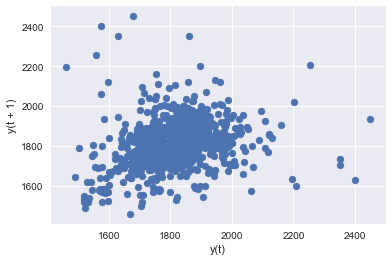

In [43]:
lag_plot(total_calories_weight['Tracker_Calories'])
plt.show()

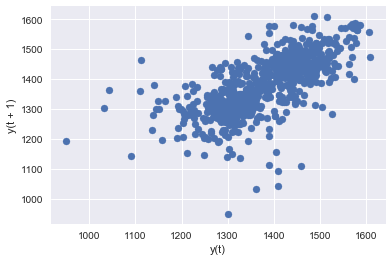

In [44]:
#Lag plot for Excess calories 

lag_plot(total_calories_weight['Excess'])
plt.show()

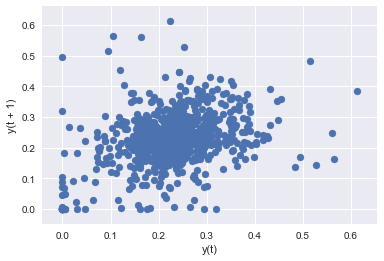

In [45]:
#Lag plot for calorie ratio

lag_plot(total_calories_weight['Ratio'])
plt.show()

Plot of the autocorrelation and PACF function for Weight

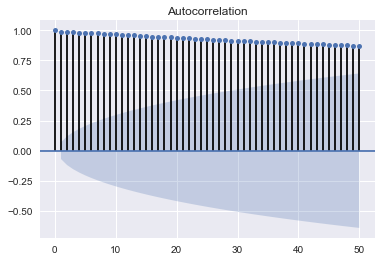

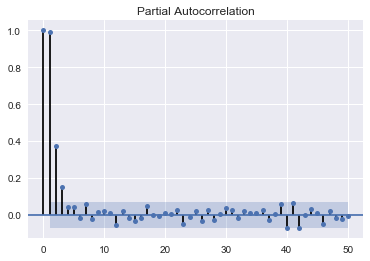

In [46]:


plot_acf(total_calories_weight['weight'], lags=50)
plot_pacf(total_calories_weight['weight'], lags=50)
plt.show()

Autocorrelation and PACF for Excess Calories, probably not a stationary time series, although there is some tapering off of ACF

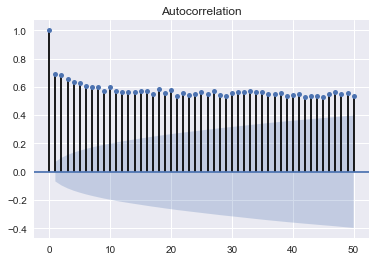

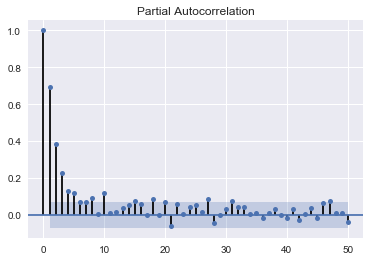

In [47]:
plot_acf(total_calories_weight['Excess'].loc['2013-07-04':], lags=50)
plot_pacf(total_calories_weight['Excess'].loc['2013-07-04':], lags=50)
plt.show()


Check with adfuller test whether series is stationary or not

In [48]:
from statsmodels.tsa.stattools import adfuller
test_weight = adfuller(total_calories_weight['weight'])
print('ADF Statistic Weight: %f' % test_weight[0])
print('p-value Weight: %f' % test_weight[1])                     #series is not stationary


ADF Statistic Weight: -1.062493
p-value Weight: 0.729795


In [49]:
test_excess = adfuller(total_calories_weight['Excess'])             #series is not stationary
print('ADF Statistic Excess: %f' % test_excess[0])
print('p-value Excess: %f' % test_excess[1])

ADF Statistic Excess: -1.629483
p-value Excess: 0.467761


In [48]:
from statsmodels.tsa.stattools import kpss
kpss(total_calories_weight['weight'],regression='ct')

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.53394872931819792,
 0.01,
 21,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

In [49]:
from statsmodels.tsa.stattools import kpss
kpss(total_calories_weight['Excess'],regression='ct')

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(0.38598203653222768,
 0.01,
 21,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Rolling Averages for Calorie Ratio and Weight, along with plots. Here I looked at monthly average

In [50]:


total_calories_weight['Rolling Avg Ratio'] = total_calories_weight['Ratio'].rolling(window=30).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=30).mean()

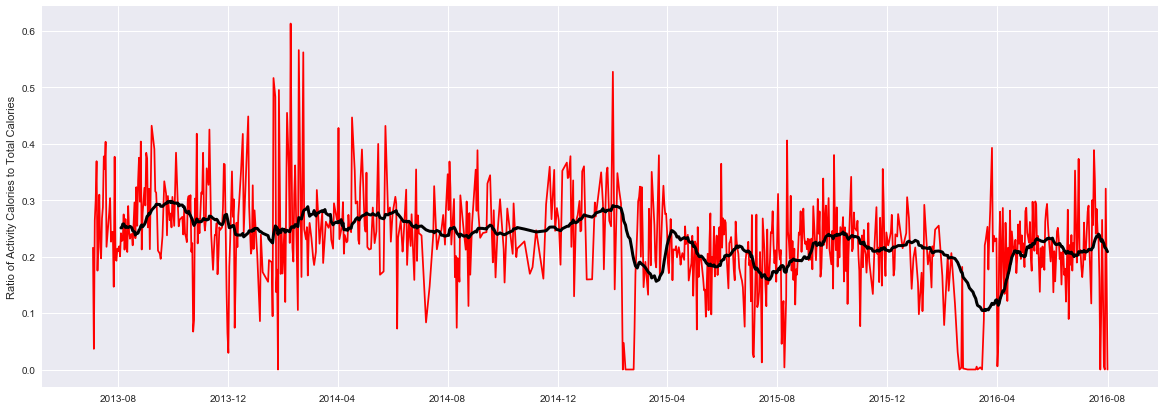

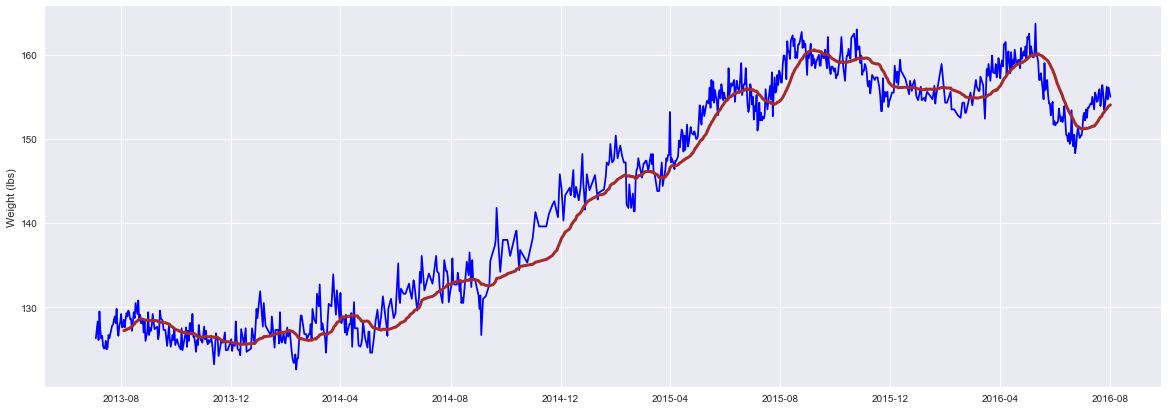

In [51]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Ratio'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Ratio'], 'black',linewidth=3.0)
plt.ylabel('Ratio of Activity Calories to Total Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')



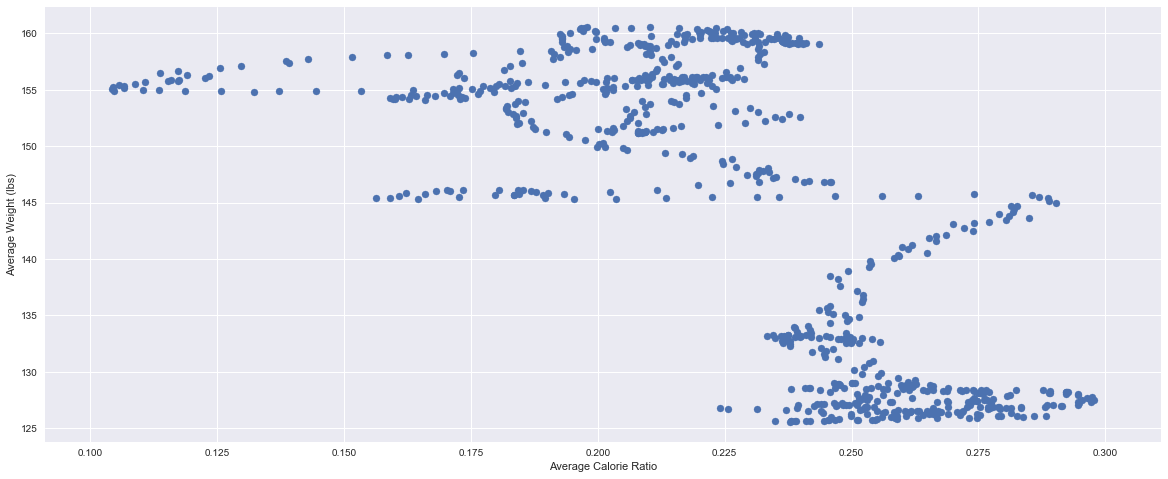

In [52]:
#Plot of Rolling average calorie ratio and weights at the times

plt.figure(1,figsize=(20,8))
plt.xlabel('Average Calorie Ratio')
plt.ylabel('Average Weight (lbs)')
plt.scatter(total_calories_weight['Rolling Avg Ratio'],total_calories_weight['Rolling Avg Weight'])

In [53]:
total_calories_weight

Tracker_Act_Calories  Tracker_Calories     Ratio  Excess    bmi  \
date                                                                          
2013-07-04                   367              1703  0.215502    1336  21.68   
2013-07-05                    55              1501  0.036642    1446  21.84   
2013-07-06                   473              1791  0.264098    1318  22.02   
2013-07-07                   542              1807  0.299945    1265  21.63   
2013-07-08                   716              1941  0.368882    1225  22.23   
2013-07-09                   289              1650  0.175152    1361  21.83   
2013-07-10                   411              1728  0.237847    1317  21.68   
2013-07-11                   569              1838  0.309576    1269  21.74   
2013-07-12                   368              1694  0.217237    1326  21.52   
2013-07-13                   328              1666  0.196879    1338  21.47   
2013-07-14                   471              1759  0.267766    1288  21.47   
2013-07-15                   517              1798  0.287542    1281  21.62   
2013-07-16                   723              1916  0.377349    1193  21.45   
2013-07-17                   680              1916  0.354906    1236  21.49   
2013-07-18                   834              2068  0.403288    1234  21.75   
2013-07-19                   368              1693  0.217366    1325  21.67   
2013-07-22                   498              1789  0.278368    1291  21.93   
2013-07-23                   550              1812  0.303532    1262  21.96   
2013-07-24                   390              1723  0.226349    1333  22.05   
2013-07-25                   425              1743  0.243832    1318  22.13   
2013-07-26                   424              1741  0.243538    1317  21.99   
2013-07-27                   239              1630  0.146626    1391  22.27   
2013-07-28                   732              1943  0.376737    1211  21.87   
2013-07-29                   327              1671  0.195691    1344  21.73   
2013-07-30                   323              1677  0.192606    1354  21.94   
2013-07-31                   367              1713  0.214244    1346  22.00   
2013-08-01                   357              1701  0.209877    1344  22.17   
2013-08-02                   372              1705  0.218182    1333  21.90   
2013-08-03                   337              1682  0.200357    1345  21.92   
2013-08-04                   419              1736  0.241359    1317  22.06   
...                          ...               ...       ...     ...    ...   
2016-06-29                   447              1850  0.241622    1403  25.82   
2016-06-30                   759              2035  0.372973    1276  25.82   
2016-07-01                   364              1794  0.202899    1430  25.94   
2016-07-02                   384              1816  0.211454    1432  26.21   
2016-07-03                   321              1766  0.181767    1445  26.28   
2016-07-04                   286              1748  0.163616    1462  26.13   
2016-07-05                   331              1789  0.185020    1458  26.35   
2016-07-06                   491              1888  0.260064    1397  26.17   
2016-07-07                   350              1802  0.194229    1452  26.38   
2016-07-08                   383              1821  0.210324    1438  26.38   
2016-07-10                   538              1924  0.279626    1386  26.47   
2016-07-11                   566              1950  0.290256    1384  26.44   
2016-07-12                   390              1838  0.212187    1448  26.61   
2016-07-14                   199              1701  0.116990    1502  26.34   
2016-07-15                   593              1978  0.299798    1385  26.69   
2016-07-16                   485              1896  0.255802    1411  26.64   
2016-07-17                   855              2201  0.388460    1346  26.49   
2016-07-18                   679              2019  0.336305  

Plots for Excess Calories together with Weight over Time 

In [50]:
total_calories_weight['Rolling Avg Excess'] = total_calories_weight['Excess'].rolling(window=7).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=7).mean()

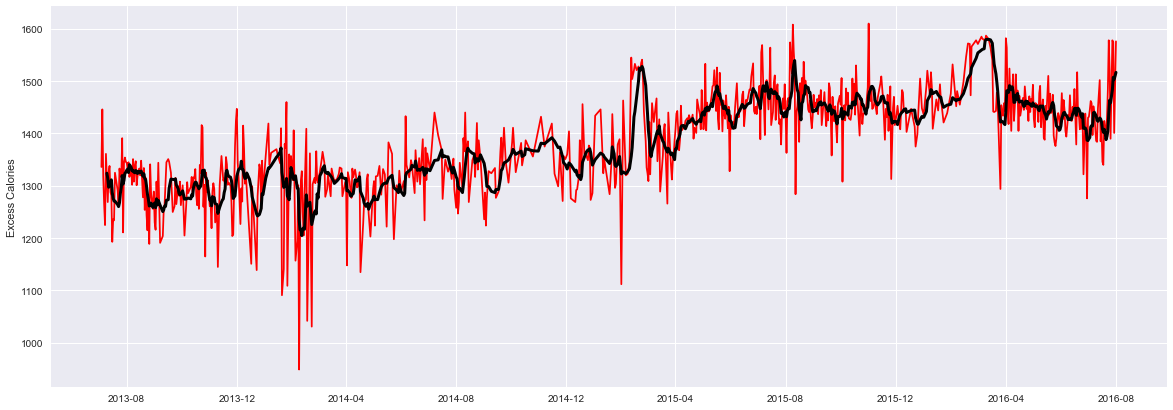

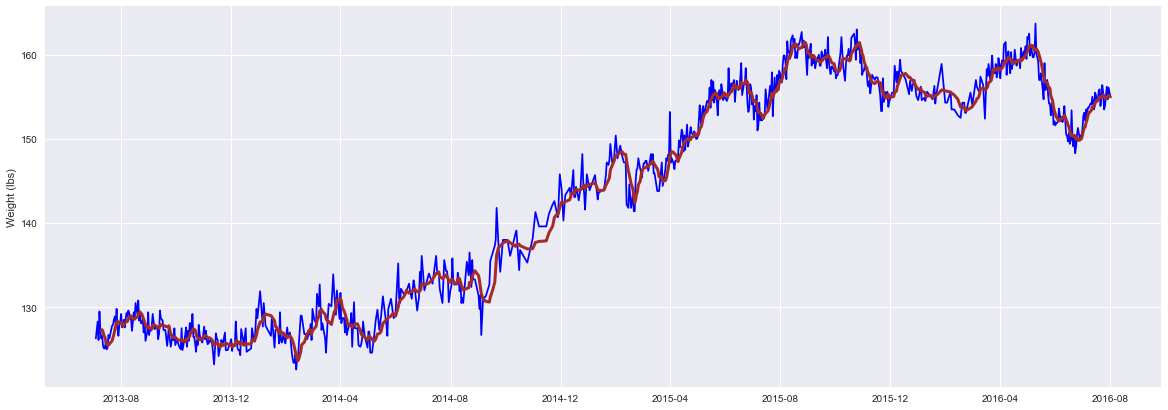

In [51]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Excess'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Excess'], 'black',linewidth=3.0)
plt.ylabel('Excess Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')

Plot of (raw) Weight and Excess Calories at the same time. Shows some good correlation with larger weight, larger excess calories


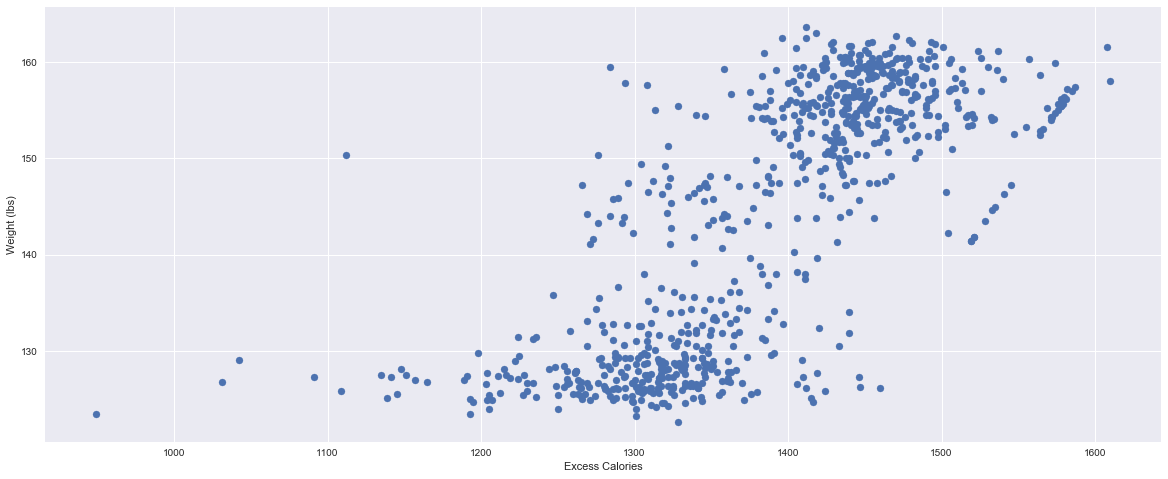

In [52]:
plt.figure(1,figsize=(20,8))
plt.xlabel('Excess Calories')
plt.ylabel('Weight (lbs)')
plt.scatter(total_calories_weight['Excess'],total_calories_weight['weight'])
plt.savefig('WeightvExcess.png')

Cross correlation between (raw) Excess and weight

In [58]:


for i in range(-10,10,1):
    print('shift day:', i, total_calories_weight['Excess'].corr(total_calories_weight['weight'].shift(i)))  

shift day: -10 0.757787632159
shift day: -9 0.756395766569
shift day: -8 0.7573898991
shift day: -7 0.758398331265
shift day: -6 0.7605055611
shift day: -5 0.758579876532
shift day: -4 0.759821331442
shift day: -3 0.761777738102
shift day: -2 0.758841836367
shift day: -1 0.759807060276
shift day: 0 0.759228925451
shift day: 1 0.758107250631
shift day: 2 0.76005220953
shift day: 3 0.752811926889
shift day: 4 0.756801560833
shift day: 5 0.761747143821
shift day: 6 0.757898517719
shift day: 7 0.759174711528
shift day: 8 0.759320904203
shift day: 9 0.760755146977


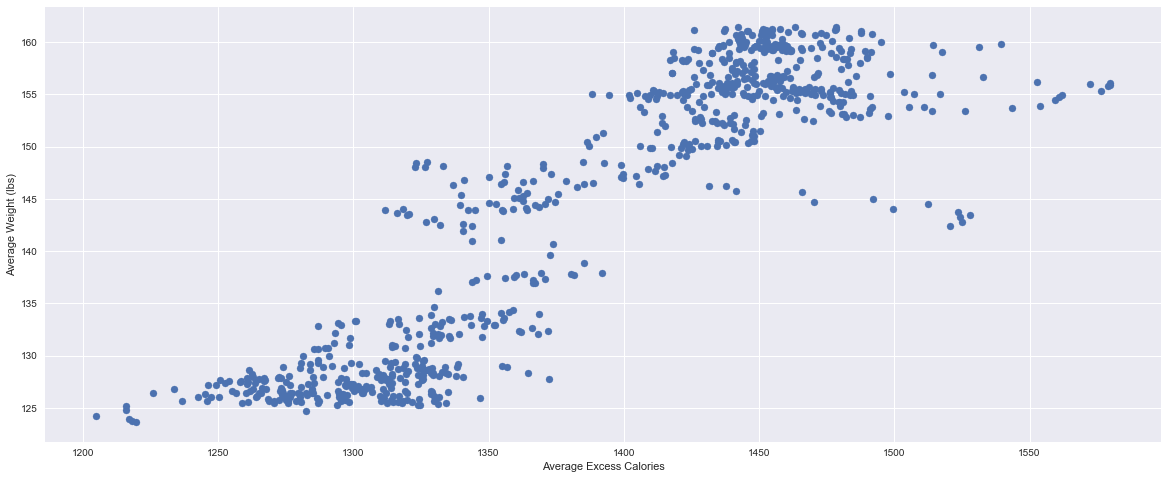

In [59]:
#Plot of Average Weight and Average Excess Calories. Shows a pretty strong correlation, stronger than the other variables 

plt.figure(1,figsize=(20,8))
plt.xlabel('Average Excess Calories')
plt.ylabel('Average Weight (lbs)')
plt.scatter(total_calories_weight['Rolling Avg Excess'],total_calories_weight['Rolling Avg Weight'])

In [60]:
#cross correlation function between Excess and Weight

for i in range(0,20,1):
    print('shift day:', i, total_calories_weight['Rolling Avg Excess'].corr(total_calories_weight['Rolling Avg Weight'].shift(i)))  

shift day: 0 0.901819456314
shift day: 1 0.901418191526
shift day: 2 0.900991693206
shift day: 3 0.900515234234
shift day: 4 0.900444942238
shift day: 5 0.900580570051
shift day: 6 0.900682806254
shift day: 7 0.900697407415
shift day: 8 0.900608788571
shift day: 9 0.900331534308
shift day: 10 0.899760258574
shift day: 11 0.898757195389
shift day: 12 0.897422430676
shift day: 13 0.895771128283
shift day: 14 0.893860119869
shift day: 15 0.891896126655
shift day: 16 0.890069289946
shift day: 17 0.888267419678
shift day: 18 0.886560422033
shift day: 19 0.885134976544


# Study the possible relationship between Excess calories and Weight time series:

Excess calories as the x variable and weight as the y 

Take first differences of Excess Calories to "difference" the variables. Variables look stationary. 

In [63]:


total_calories_weight['Diff Excess'] = total_calories_weight['Excess'].diff()
total_calories_weight['Diff Weight'] = total_calories_weight['weight'].diff()

In [64]:
total_calories_weight['Diff Weight']

date
2013-07-04    NaN
2013-07-05    1.0
2013-07-06    1.0
2013-07-07   -2.2
2013-07-08    3.4
2013-07-09   -2.3
2013-07-10   -0.9
2013-07-11    0.3
2013-07-12   -1.2
2013-07-13   -0.3
2013-07-14    0.0
2013-07-15    0.9
2013-07-16   -1.0
2013-07-17    0.2
2013-07-18    1.5
2013-07-19   -0.4
2013-07-22    1.5
2013-07-23    0.1
2013-07-24    0.6
2013-07-25    0.4
2013-07-26   -0.8
2013-07-27    1.7
2013-07-28   -2.4
2013-07-29   -0.8
2013-07-30    1.2
2013-07-31    0.4
2013-08-01    1.0
2013-08-02   -1.6
2013-08-03    0.1
2013-08-04    0.8
             ... 
2016-06-29    0.3
2016-06-30    0.0
2016-07-01    0.7
2016-07-02    1.6
2016-07-03    0.4
2016-07-04   -0.9
2016-07-05    1.3
2016-07-06   -1.0
2016-07-07    1.2
2016-07-08    0.0
2016-07-10    0.5
2016-07-11   -0.1
2016-07-12    0.9
2016-07-14   -1.5
2016-07-15    2.0
2016-07-16   -0.3
2016-07-17   -0.8
2016-07-18    0.1
2016-07-19    1.1
2016-07-20    0.3
2016-07-21   -2.0
2016-07-22    1.0
2016-07-23    1.5
2016-07-24   -0.9
2016-

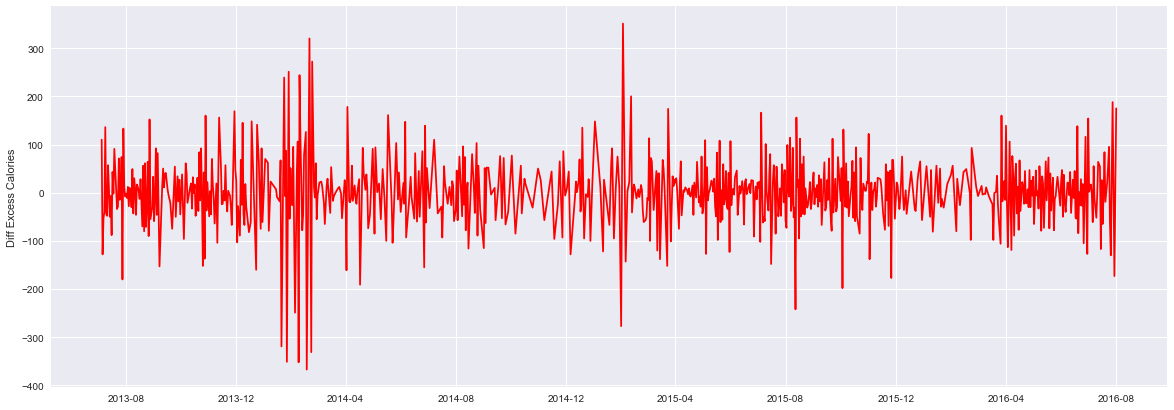

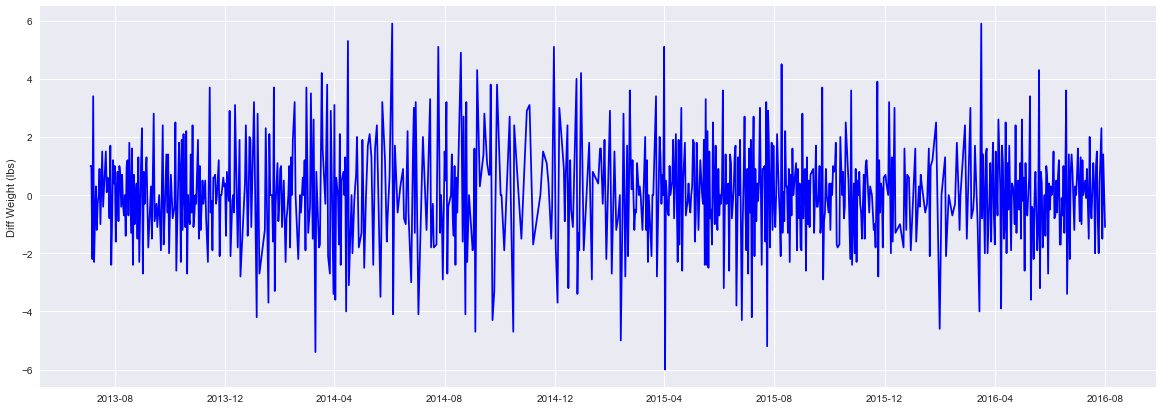

In [65]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Diff Excess'],'r')
plt.ylabel('Diff Excess Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['Diff Weight'],'b')
plt.ylabel('Diff Weight (lbs)')

In [71]:
test_diff_weight = adfuller(total_calories_weight['Diff Weight'].loc['2013-07-05':])
print('ADF Statistic Diff Weight: %f' % test_diff_weight[0])
print('p-value Diff Weight: %f' % test_diff_weight[1])  

ADF Statistic Diff Weight: -14.891075
p-value Diff Weight: 0.000000


In [72]:
test_diff_weight = adfuller(total_calories_weight['Diff Excess'].loc['2013-07-05':])
print('ADF Statistic Diff Excess: %f' % test_diff_weight[0])
print('p-value Diff Excess: %f' % test_diff_weight[1])  

ADF Statistic Diff Excess: -9.046751
p-value Diff Excess: 0.000000


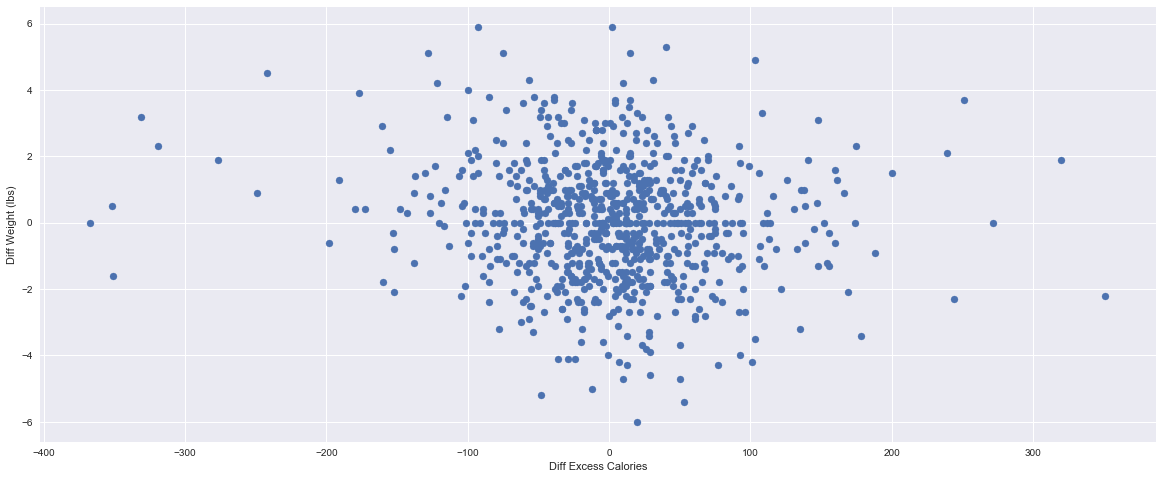

In [75]:
plt.figure(1,figsize=(20,8))
plt.xlabel('Diff Excess Calories')
plt.ylabel('Diff Weight (lbs)')
plt.scatter(total_calories_weight['Diff Excess'],total_calories_weight['Diff Weight'].shift(3))

In [76]:
for i in range(-10,10,1):
    print('shift day:', i,total_calories_weight['Diff Excess'].corr(total_calories_weight['Diff Weight'].shift(i)))  

shift day: -10 0.0272518053785
shift day: -9 -0.0206143384495
shift day: -8 0.00289620540207
shift day: -7 -0.0159231236262
shift day: -6 0.0420008009202
shift day: -5 -0.0358034723037
shift day: -4 -0.00515278124633
shift day: -3 0.0483763148009
shift day: -2 -0.0392152108993
shift day: -1 0.0158492810317
shift day: 0 0.00703500102202
shift day: 1 -0.0131945003608
shift day: 2 0.0698541877416
shift day: 3 -0.112791903754
shift day: 4 -0.00429108884121
shift day: 5 0.0898840793114
shift day: 6 -0.0559139513688
shift day: 7 0.00809013008487
shift day: 8 -0.00961760982424
shift day: 9 0.0332796999337


In [77]:
total_calories_weight['New Diff Excess'] = total_calories_weight['Excess'].diff(7)
total_calories_weight['New Diff Weight'] = total_calories_weight['weight'].diff(7)

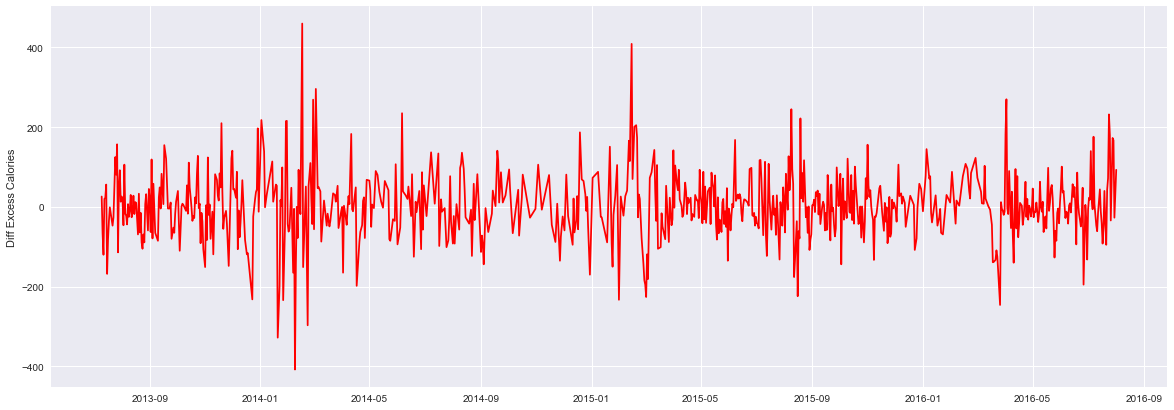

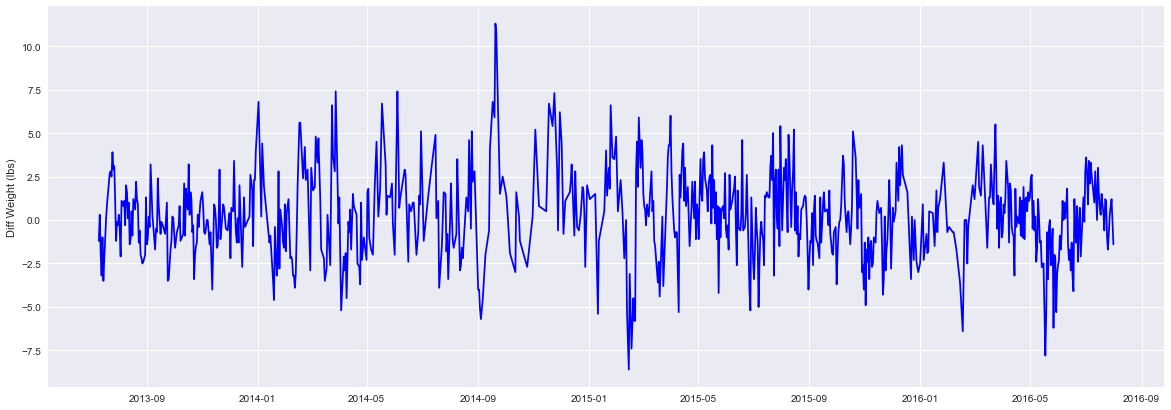

In [78]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['New Diff Excess'],'r')
plt.ylabel('Diff Excess Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['New Diff Weight'],'b')
plt.ylabel('Diff Weight (lbs)')

In [79]:
for i in range(-50,50,1):
    print('shift day:', i, total_calories_weight['New Diff Weight'].corr(total_calories_weight['New Diff Excess'].shift(i)))  

shift day: -50 -0.0371529422909
shift day: -49 -0.00332622433398
shift day: -48 -0.0148069483262
shift day: -47 0.0239920704599
shift day: -46 0.0950848544672
shift day: -45 0.0621197222254
shift day: -44 0.0259152613423
shift day: -43 0.0139960353819
shift day: -42 -0.0105024816717
shift day: -41 0.0676126206186
shift day: -40 -0.0232833120216
shift day: -39 -0.0243824294403
shift day: -38 0.00802728479404
shift day: -37 -0.00280245304193
shift day: -36 0.00939935389343
shift day: -35 0.0277263543157
shift day: -34 -0.0453906016249
shift day: -33 0.0442994675236
shift day: -32 0.0269216143381
shift day: -31 -0.0278456974749
shift day: -30 -0.00515149456183
shift day: -29 0.00381772713453
shift day: -28 -0.0121313212128
shift day: -27 0.0285997108823
shift day: -26 -0.0793290774664
shift day: -25 -0.041611088396
shift day: -24 -0.0166413803028
shift day: -23 -0.00385094584958
shift day: -22 -0.0230680097634
shift day: -21 -0.0286391757454
shift day: -20 -0.0602395980207
shift day: -19 

Autocorrelation and PACF plots for the Differences of Excess. Here we study one type of ARMA model and investigate it's properties using information criteria and studies of the residuals

In [ ]:

plot_acf(total_calories_weight['Diff Excess'].loc['2013-07-05':], lags=50)
plt.xlim(0.1,50)
plt.savefig('correlation1.png')
plot_pacf(total_calories_weight['Diff Excess'].loc['2013-07-05':], lags=50)
plt.xlim(0.1,50)
plt.savefig('correlation2.png')
plt.show()

In [81]:
excess_mod01 = ARMA(total_calories_weight['Diff Weight'].loc['07-04-2013':].astype('float64'), (1,0)).fit()
print(excess_mod01.params)

const                0.035321
ar.L1.Diff Weight   -0.437346
dtype: float64


In [82]:
print(excess_mod01.aic, excess_mod01.bic, excess_mod01.hqic)

3033.0803804842485 3047.13046332 3038.47810646


In [83]:
sm.stats.durbin_watson(excess_mod01.resid.values)

2.1837136839955771

In [84]:
resid_excess = excess_mod01.resid
stats.normaltest(resid_excess)

NormaltestResult(statistic=11.512134934176315, pvalue=0.0031635278461643705)

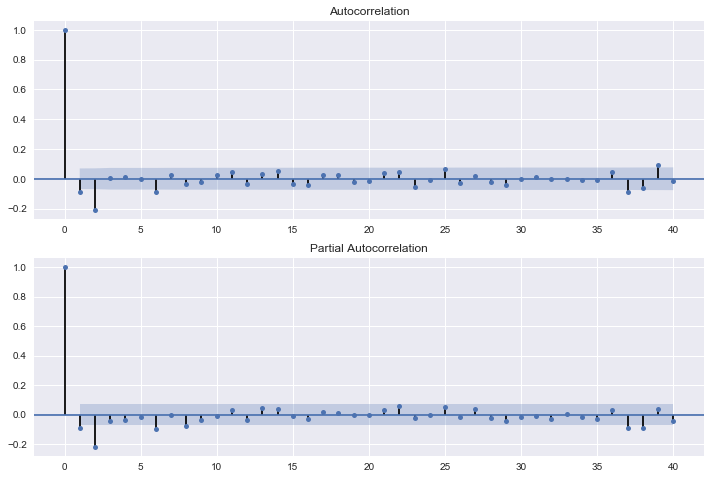

In [85]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid_excess.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid_excess, lags=40, ax=ax2)

In [86]:
r,q,p = sm.tsa.acf(resid_excess.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0  -0.092296   6.831865  8.954571e-03
2.0  -0.207308  41.342653  1.053312e-09
3.0   0.004934  41.362226  5.478881e-09
4.0   0.013850  41.516644  2.100877e-08
5.0  -0.004261  41.531278  7.327522e-08
6.0  -0.086683  47.595478  1.423223e-08
7.0   0.026077  48.144964  3.335656e-08
8.0  -0.036191  49.204718  5.808374e-08
9.0  -0.024563  49.693519  1.230022e-07
10.0  0.026736  50.273321  2.377252e-07
11.0  0.046174  52.004912  2.720851e-07
12.0 -0.034096  52.950317  4.204051e-07
13.0  0.029824  53.674584  6.893733e-07
14.0  0.050012  55.713810  6.525558e-07
15.0 -0.032572  56.579873  9.668722e-07
16.0 -0.040636  57.929596  1.163919e-06
17.0  0.023667  58.388017  1.934206e-06
18.0  0.026572  58.966633  3.002217e-06
19.0 -0.024054  59.441380  4.741402e-06
20.0 -0.013961  59.601521  8.206867e-06
21.0  0.036149  60.676486  1.008384e-05
22.0  0.047962  62.571275  9.232887e-06
23.0 -0.054243  64.997871  7.016958e-06


In [87]:
from statsmodels.tsa.filters.filtertools import convolution_filter

In [88]:
filter_weight = convolution_filter(total_calories_weight['Diff Weight'], 
                   [ -0.723941, -0.532053, -0.404083, -0.335810, -0.268097,
                    -0.242925, -0.202907, -0.123392, -0.146510, -0.017584], nsides=1)



In [89]:
filter_weight_new = (filter_weight+total_calories_weight['Diff Weight']).dropna()

In [90]:
resid_excess_new = resid_excess.loc['2013-07-13':]

In [91]:
for i in range(-10,10,1):
    print('shift day:', i, filter_weight_new.corr(resid_excess_new.shift(i)))  

shift day: -10 -0.0410327589298
shift day: -9 -0.0367698336971
shift day: -8 -0.011926585992
shift day: -7 0.0259493369125
shift day: -6 -0.0608084598207
shift day: -5 0.0762698800206
shift day: -4 0.0234884218954
shift day: -3 0.0155576933501
shift day: -2 -0.0608438514353
shift day: -1 0.164918820724
shift day: 0 0.487040995592
shift day: 1 -0.801245584212
shift day: 2 -0.0694261404592
shift day: 3 -0.118319974468
shift day: 4 -0.0646164320113
shift day: 5 -0.124607785302
shift day: 6 -0.0943315219775
shift day: 7 0.0568685387657
shift day: 8 -0.133800878665
shift day: 9 0.121913303243


In [92]:
#somewhat of a correlation around -2, value about 0.11

# Perform an ordinary linear regression using statsmodels package. For variables at the same time , check whether there are correlations with the residuals 

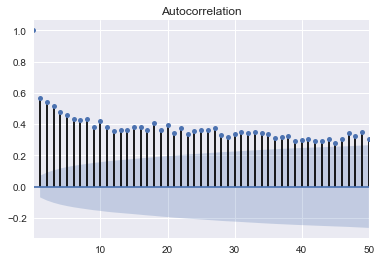

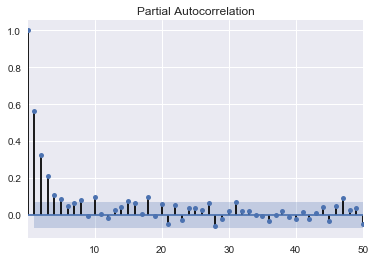

In [66]:


Y1 = total_calories_weight['weight']
X1 = total_calories_weight['Excess']
X1 = sm.add_constant(X1)

model_reg= sm.OLS(Y1,X1)
results_reg  = model_reg.fit()


resid_reg = results_reg.resid

plot_acf(resid_reg, lags=50)
plt.xlim(0.1,50)
plot_pacf(resid_reg, lags=50)
plt.xlim(0.1,50)
plt.show()


In [67]:
results_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1082.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          1.88e-150
Time:                        11:20:18   Log-Likelihood:                -2852.5
No. Observations:                 797   AIC:                             5709.
Df Residuals:                     795   BIC:                             5718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8488      4.598     -1.490      0.137     -15.874       2.177
Excess         0.1088      0.003     32.892      0.000       0.102       0.115
==============================================================================
Omnibus:                        0.234   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.326
Skew:                          -0.017   Prob(JB):                        0.849
Kurtosis:                       2.907   Cond. No.                     2.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now consider a linear trend in addition to the linear relation between weight and excess calories 

In [68]:
total_calories_weight['time index'] = range(797)

In [69]:
Y1 = total_calories_weight['weight']
X1 = total_calories_weight[['Excess','time index']]
X1 = sm.add_constant(X1)

model_1_reg= sm.OLS(Y1,X1)
results_1_reg  = model_1_reg.fit()

results_1_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2128.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          1.12e-319
Time:                        11:20:26   Log-Likelihood:                -2457.6
No. Observations:                 797   AIC:                             4921.
Df Residuals:                     794   BIC:                             4935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.3425      3.606     21.169      0.000      69.263      83.421
Excess         0.0368      0.003     13.097      0.000       0.031       0.042
time index     0.0417      0.001     36.670      0.000       0.039       0.044
==============================================================================
Omnibus:                       29.358   Durbin-Watson:                   0.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.010
Skew:                          -0.077   Prob(JB):                     0.000907
Kurtosis:                       2.369   Cond. No.                     2.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

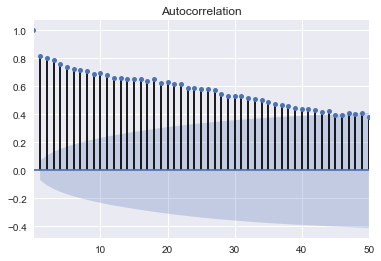

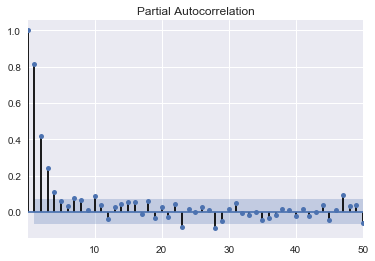

In [82]:
resid_1_reg = results_1_reg.resid

plot_acf(resid_1_reg, lags=50)
plt.xlim(0.1,50)
plt.savefig('resid_acf.png')
plot_pacf(resid_1_reg, lags=50)
plt.xlim(0.1,50)
plt.savefig('resid_pcf.png')
plt.show()

The residuals themselves clearly have a time series structure. In particular, the plots indicate this time series is not stationary and should be first differenced 

In [83]:
diff_of_resid = resid_1_reg.diff()


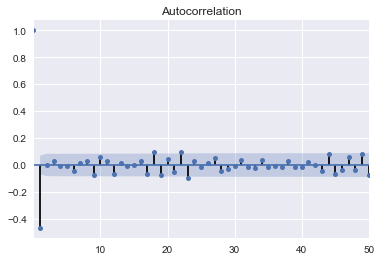

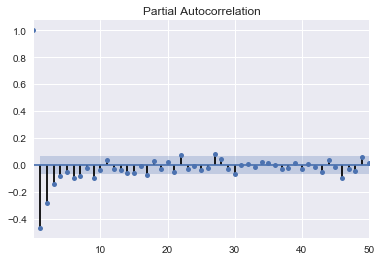

In [85]:
plot_acf(diff_of_resid.loc['07-05-2013':], lags=50)
plt.xlim(0.1,50)
plot_pacf(diff_of_resid.loc['07-05-2013':], lags=50)
plt.xlim(0.1,50)
plt.show()

In [86]:
OLS_resid_mod = ARMA(diff_of_resid.loc['07-05-2013':], (0,1)).fit()
print(OLS_resid_mod.params)

const     -0.014145
ma.L1.y   -0.682505
dtype: float64


In [87]:
print(OLS_resid_mod.aic, OLS_resid_mod.bic, OLS_resid_mod.hqic)

3821.7802311437363 3835.8190287 3827.17457905


In [88]:
sm.stats.durbin_watson(OLS_resid_mod.resid.values)

1.978791553464843

In [90]:
resid01 = OLS_resid_mod.resid
stats.normaltest(resid01)

NormaltestResult(statistic=53.825138397511381, pvalue=2.0512552383878039e-12)

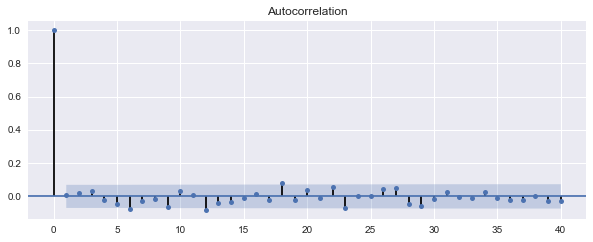

In [92]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid01.values.squeeze(), lags=40, ax=ax1)

plt.savefig('resid_acf_2.png')
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(resid01.values.squeeze(), lags=40, ax=ax2)

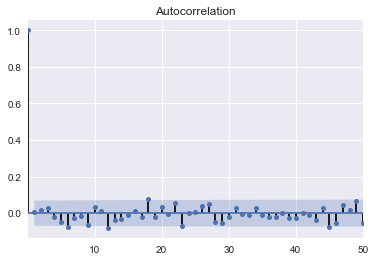

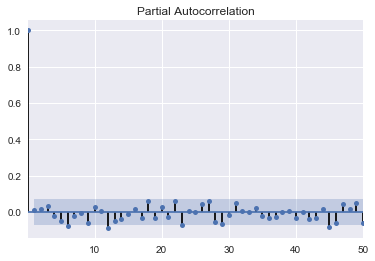

In [99]:
plot_acf(resid01, lags=50)
plt.xlim(0.1,50)
plt.savefig('resid_acf_2.png')
plot_pacf(resid01, lags=50)
plt.xlim(0.1,50)
plt.savefig('resid_pcf_2.png')
plt.show()


# Try out some ARIMA models:

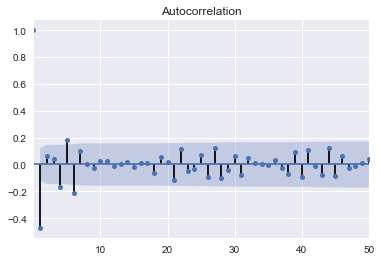

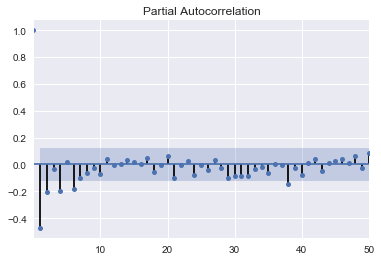

In [105]:
#Autocorrelation and PACF plots for the Differences of Weight
plot_acf(total_calories_weight['Diff Weight'].loc['2013-07-04':'2014-07-04'], lags=50)
plt.xlim(0.1,50)
#plt.ylim(-0.5,0.2)
plot_pacf(total_calories_weight['Diff Weight'].loc['2013-07-04':'2014-07-04'], lags=50)
plt.xlim(0.1,50)
plt.show()


Try out ARIMA(0,1,1) model

In [64]:
arma_mod01 = sm.tsa.ARMA(total_calories_weight['Diff Weight'].loc['2013-07-04':], (0,1)).fit()
print(arma_mod01.params)

const                0.035226
ma.L1.Diff Weight   -0.558641
dtype: float64


In [65]:
print(arma_mod01.aic, arma_mod01.bic, arma_mod01.hqic)

2982.695836406702 2996.74591924 2988.09356239


In [66]:
sm.stats.durbin_watson(arma_mod01.resid.values)

2.0090640630285854

In [67]:
resid01 = arma_mod01.resid
stats.normaltest(resid01)

NormaltestResult(statistic=14.421343730216567, pvalue=0.0007386607083519469)

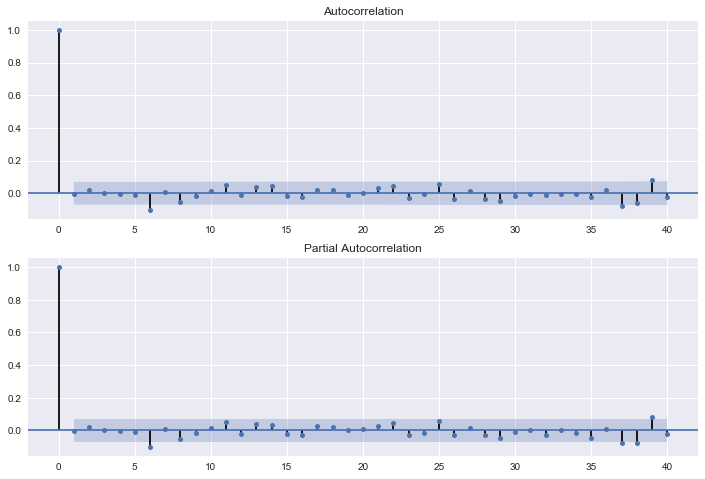

In [68]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid01.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid01, lags=40, ax=ax2)

In [69]:
r,q,p = sm.tsa.acf(resid01.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.004999   0.020038  0.887430
2.0   0.020196   0.347553  0.840485
3.0   0.002767   0.353707  0.949631
4.0  -0.005579   0.378759  0.984179
5.0  -0.011126   0.478540  0.992888
6.0  -0.100296   8.596968  0.197545
7.0   0.006361   8.629667  0.280349
8.0  -0.056495  11.212051  0.189971
9.0  -0.014738  11.388014  0.250047
10.0  0.014024  11.547545  0.316478
11.0  0.051305  13.685364  0.250895
12.0 -0.013166  13.826320  0.311936
13.0  0.039883  15.121510  0.299829
14.0  0.042716  16.609106  0.277607
15.0 -0.017957  16.872346  0.326553
16.0 -0.025780  17.415590  0.359210
17.0  0.016804  17.646676  0.411452
18.0  0.021626  18.029930  0.453683
19.0 -0.010927  18.127900  0.513910
20.0  0.003401  18.137403  0.578357
21.0  0.030441  18.899699  0.591574
22.0  0.046713  20.697076  0.539521
23.0 -0.030696  21.474176  0.552154
24.0 -0.006226  21.506184  0.608715
25.0  0.055153  24.021384  0.518138
26.0 -0.033770  24.965605  0

Does taking the log smooth out the data or tell us something interesting? 

In [82]:
total_calories_weight['Diff Log Excess'] = np.log(total_calories_weight['Excess']).diff()
total_calories_weight['Diff Log Weight'] = np.log(total_calories_weight['weight']).diff()

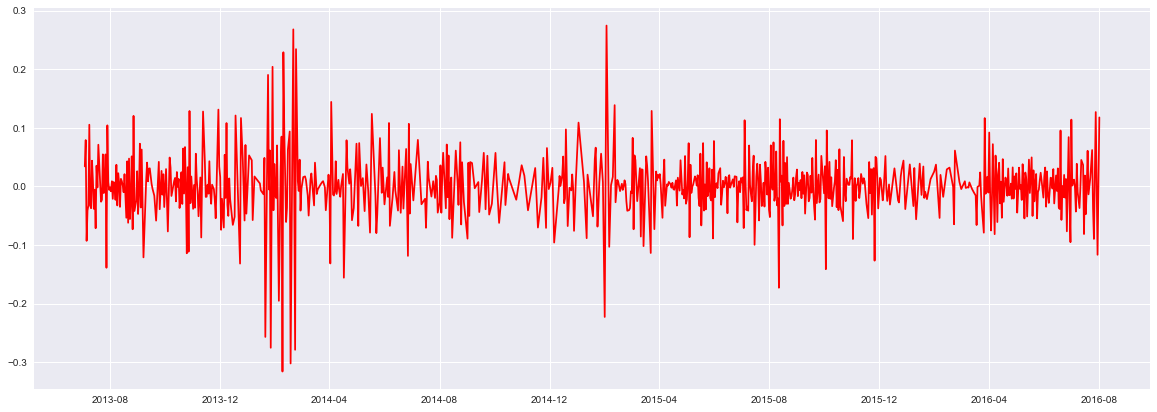

In [81]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Diff Log Excess'],'r')

In [74]:
test_diff_weight_new = adfuller(total_calories_weight['Diff Log Weight'].loc['2013-07-04':])
print('ADF Statistic Diff Weight: %f' % test_diff_weight_new[0])
print('p-value Diff Weight: %f' % test_diff_weight_new[1])  

ADF Statistic Diff Weight: -12.042751
p-value Diff Weight: 0.000000


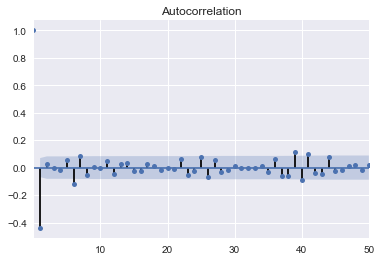

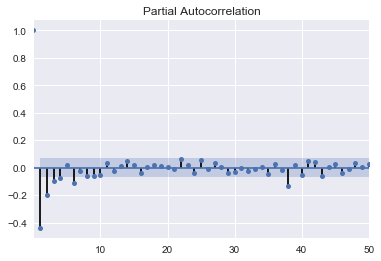

In [73]:
plot_acf(total_calories_weight['Diff Log Weight'].loc['2013-07-04':], lags=50)
plt.xlim(0.1,50)
plot_pacf(total_calories_weight['Diff Log Weight'].loc['2013-07-04':], lags=50)
plt.xlim(0.1,50)
plt.show()

In [76]:
from pandas import datetime

In [77]:
arma_mod_guess = sm.tsa.ARIMA(total_calories_weight['weight'].loc['2013-07-03':'2014-07-04'], (0,1,1)).fit()
print(arma_mod_guess.params)

const             0.023167
ma.L1.D.weight   -0.625107
dtype: float64


In [78]:
print(arma_mod_guess.aic, arma_mod_guess.bic, arma_mod_guess.hqic)

972.9161837225822 983.621217234 977.218770482


In [79]:
#966.5791197613971 998.694220295 979.486880039

In [80]:
sm.stats.durbin_watson(arma_mod_guess.resid.values)

1.9842063923345796

In [81]:
resid_guess = arma_mod_guess.resid
stats.normaltest(resid_guess)

NormaltestResult(statistic=14.666028466351742, pvalue=0.00065360051062036907)

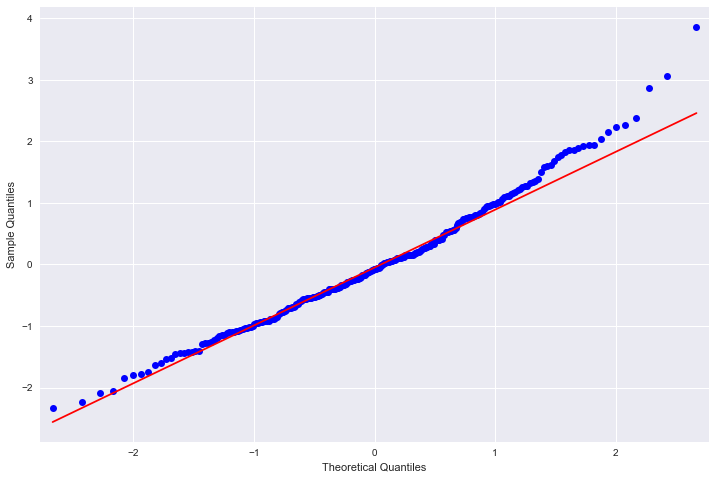

In [82]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid_guess, line='q', ax=ax, fit=True)

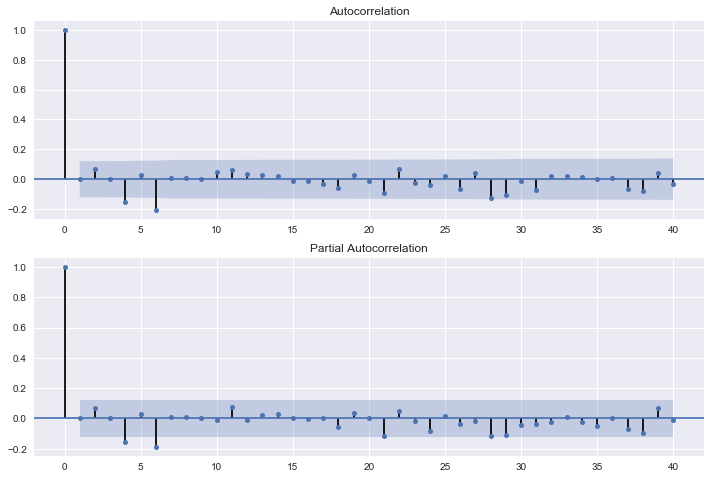

In [83]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid_guess.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid_guess, lags=40, ax=ax2)

In [84]:
r,q,p = sm.tsa.acf(resid_guess.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.003567   0.003372  0.953692
2.0   0.067129   1.202184  0.548213
3.0   0.000730   1.202327  0.752446
4.0  -0.149572   7.200007  0.125689
5.0   0.025140   7.370103  0.194538
6.0  -0.203540  18.563610  0.004968
7.0   0.007520  18.578948  0.009614
8.0   0.007647  18.594870  0.017183
9.0  -0.000906  18.595095  0.028864
10.0  0.051487  19.322694  0.036350
11.0  0.060916  20.345272  0.040824
12.0  0.032241  20.632861  0.056022
13.0  0.027597  20.844412  0.076064
14.0  0.019618  20.951748  0.102875
15.0 -0.015190  21.016358  0.136308
16.0 -0.010682  21.048441  0.176656
17.0 -0.030275  21.307204  0.212850
18.0 -0.060161  22.333186  0.217528
19.0  0.025401  22.516847  0.259293
20.0 -0.010027  22.545586  0.311654
21.0 -0.091184  24.931883  0.250126
22.0  0.065332  26.162015  0.244791
23.0 -0.028262  26.393170  0.282659
24.0 -0.039351  26.843196  0.311815
25.0  0.023213  27.000451  0.355862
26.0 -0.062788  28.155885  0

# Here we will perform a GridSearch and train/test split. We find to find the choice of the ARIMA model parameters that is the best fit of the data 

In [70]:
import sklearn.metrics 


In [71]:
X = total_calories_weight['weight'].values

In [72]:
size = int(len(X)*0.25)

In [73]:
train, test = X[:size], X[size:2*size]

In [74]:
history = [x for x in train]

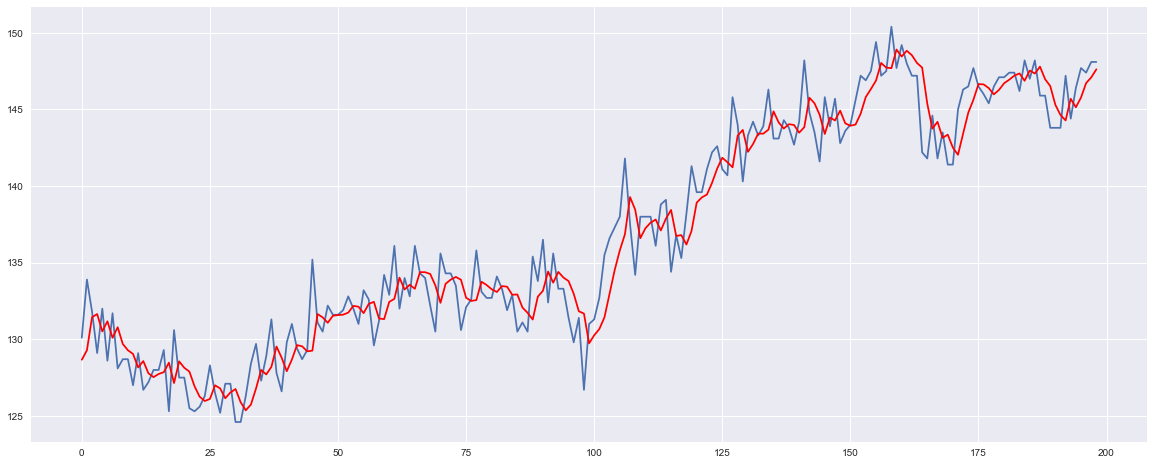

In [75]:
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.figure(1,figsize=(20,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [76]:
 print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  396
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -774.160
Method:                       css-mle   S.D. of innovations              1.708
Date:                Tue, 30 Jan 2018   AIC                           1554.321
Time:                        11:36:05   BIC                           1566.265
Sample:                             1   HQIC                          1559.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0522      0.040      1.302      0.194      -0.026       0.131
ma.L1.D.y     -0.5340      0.047    -11.409      0.000      -0.626      -0.442
                                    Roots           

In [77]:
print("Mean Absolute Error:", sklearn.metrics.mean_absolute_error(test, predictions))
print('MSE:', sklearn.metrics.mean_squared_error(test, predictions))
print("R^2:", sklearn.metrics.r2_score(test, predictions))


Mean Absolute Error: 1.56840613374
MSE: 3.91363429246
R^2: 0.927019291108


In [78]:
train1, test1 = X[:2*size], X[2*size:3*size]

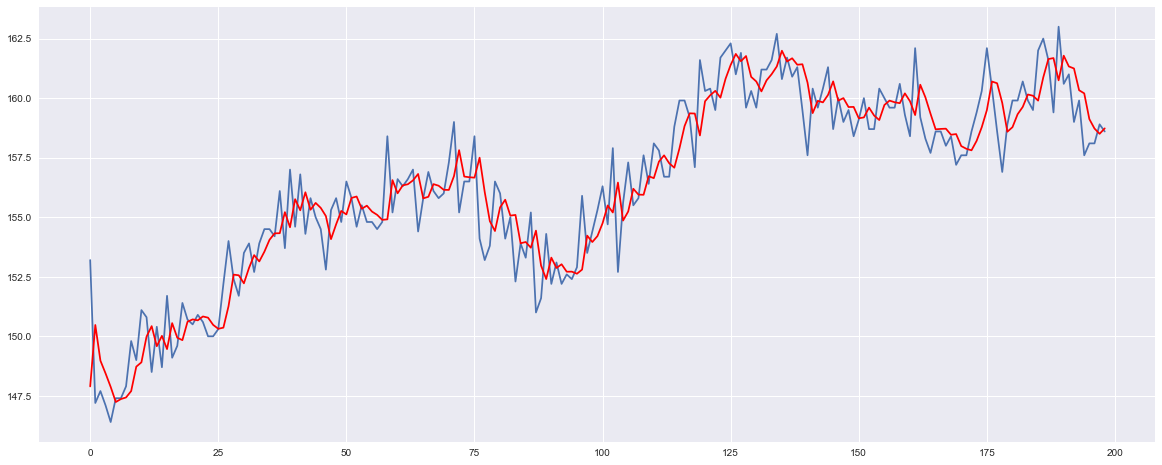

In [79]:
history = [x for x in train1]
predictions1 = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit1 = model.fit()
    output = model_fit1.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = test1[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.figure(1,figsize=(20,8))
plt.plot(test1)
plt.plot(predictions1, color='red')
plt.show()

In [80]:
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  595
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1132.518
Method:                       css-mle   S.D. of innovations              1.623
Date:                Tue, 30 Jan 2018   AIC                           2271.036
Time:                        11:37:20   BIC                           2284.202
Sample:                             1   HQIC                          2276.163
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534      0.029      1.835      0.067      -0.004       0.110
ma.L1.D.y     -0.5633      0.037    -15.313      0.000      -0.635      -0.491
                                    Roots           

In [81]:
train2, test2 = X[:3*size], X[3*size:]

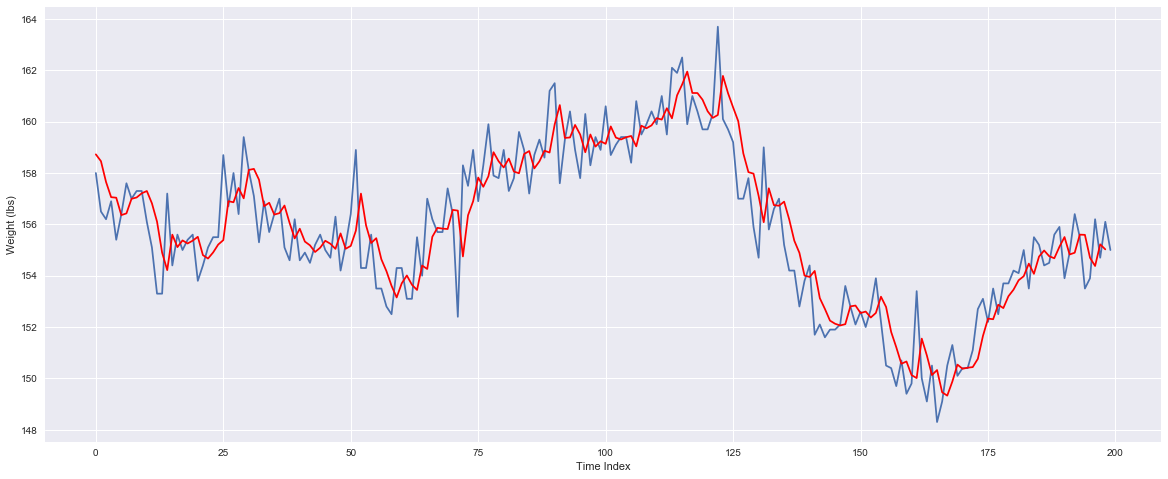

In [83]:
history = [x for x in train2]
predictions2 = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit2 = model.fit()
    output = model_fit2.forecast()
    yhat = output[0]
    predictions2.append(yhat)
    obs = test2[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.figure(1,figsize=(20,8))
plt.plot(test2)
plt.plot(predictions2, color='red')
plt.ylabel('Weight (lbs)')
plt.xlabel('Time Index')
plt.savefig('ARIMA_1.png')
plt.show()

In [148]:
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  794
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1481.151
Method:                       css-mle   S.D. of innovations              1.562
Date:                Mon, 29 Jan 2018   AIC                           2968.303
Time:                        23:59:10   BIC                           2982.334
Sample:                             1   HQIC                          2973.695
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0354      0.025      1.441      0.150      -0.013       0.083
ma.L1.D.y     -0.5582      0.030    -18.341      0.000      -0.618      -0.499
                                    Roots           

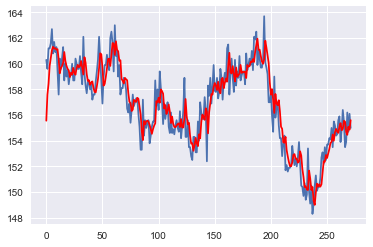

In [97]:
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(6,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [98]:
print("Mean Absolute Error:", sklearn.metrics.mean_absolute_error(test, predictions))
print('MSE:', sklearn.metrics.mean_squared_error(test, predictions))
print("R^2:", sklearn.metrics.r2_score(test, predictions))

Mean Absolute Error: 1.08744340424
MSE: 1.9356572253
R^2: 0.813101272668


In [92]:
def evaluate_arima_model(data, arima_order):
    size = int(len(data)*0.66)
    train, test = data[:size], data[size:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return sklearn.metrics.mean_absolute_error(test, predictions)

In [93]:
def evaluate_models(data, p_values, d_values, q_values):
    #data = data.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mae = evaluate_arima_model(data, order)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                    print('ARIMA%s MAE=%.3f' % (order,mae))
                except:
                    continue
    print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

In [94]:
import warnings
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = 1
q_values = 2
warnings.filterwarnings("ignore")
evaluate_models(X, p_values, d_values, q_values)

ARIMA(0, 1, 0) MAE=1.188
ARIMA(0, 1, 1) MAE=1.048
ARIMA(0, 1, 2) MAE=1.049
ARIMA(1, 1, 0) MAE=1.089
ARIMA(1, 1, 1) MAE=1.049
ARIMA(2, 1, 0) MAE=1.055
ARIMA(2, 1, 1) MAE=1.068
ARIMA(4, 1, 0) MAE=1.056
ARIMA(4, 1, 1) MAE=1.071
ARIMA(6, 1, 0) MAE=1.059
ARIMA(6, 1, 1) MAE=1.085
ARIMA(8, 1, 0) MAE=1.069
ARIMA(8, 1, 1) MAE=1.088
ARIMA(8, 1, 2) MAE=1.088
ARIMA(10, 1, 0) MAE=1.093
ARIMA(10, 1, 1) MAE=1.095
Best ARIMA(0, 1, 1) MAE=1.048


# An investigation of VAR types models

In [74]:
df_diffs = pd.concat([total_calories_weight['Diff Weight'].loc['2013-07-04':] 
                      ,total_calories_weight['Diff Excess'].loc['2013-07-04':]],axis=1)

In [76]:
from statsmodels.tsa.api import VAR, DynamicVAR



In [77]:
diff_var_model = VAR(df_diffs)

In [80]:
diff_var_model.select_order(10)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0         9.730        9.742    1.682e+04        9.735
1         9.270        9.305    1.061e+04        9.283
2         9.145        9.204        9368.        9.168
3         9.110        9.193        9048.        9.142
4         9.083       9.190*        8808.       9.124*
5         9.083        9.213        8804.        9.133
6         9.073        9.227        8721.        9.133
7         9.071        9.249        8703.        9.140
8         9.077        9.278        8752.        9.154
9        9.066*        9.291       8652.*        9.152
10        9.073        9.322        8719.        9.169
* Minimum



{'aic': 9, 'bic': 4, 'fpe': 9, 'hqic': 4}

In [82]:
model_1_fit = diff_var_model.fit(4)

In [83]:
model_1_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Jan, 2018
Time:                     13:48:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.18742
Nobs:                     795.000    HQIC:                   9.12220
Log likelihood:          -5848.01    FPE:                    8791.12
AIC:                      9.08150    Det(Omega_mle):         8595.41
--------------------------------------------------------------------
Results for equation Diff Weight
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.072385         0.055755            1.298           0.195
L1.Diff Weight        -0.558387         0.035574          -15.696           0.000
L1.Diff Excess         0.000546         0.000931  

In [118]:
model_1_fit.test_causality('Diff Weight', 'Diff Excess', kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         0.631113         2.377589            0.640  (4, 1572)
H_0: ['Diff Excess'] do not Granger-cause Diff Weight
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 2.3775887366327204,
 'df': (4, 1572),
 'pvalue': 0.64033799854846318,
 'signif': 0.05,
 'statistic': 0.63111285234753378}

Take the Log to reduce the volitility somewhat

In [85]:
total_calories_weight['Diff Log Weight'] = np.log(total_calories_weight['weight']).diff()
total_calories_weight['Diff Log Excess'] = np.log(total_calories_weight['Excess']).diff()

In [86]:
df_log_diffs = pd.concat([total_calories_weight['Diff Log Weight'].loc['2013-07-04':] 
                      ,total_calories_weight['Diff Log Excess'].loc['2013-07-04':]],axis=1)

In [87]:
diff_log_var_model = VAR(df_log_diffs)

In [95]:
diff_log_var_model.select_order(3)

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0       -14.53       -14.52    4.910e-07       -14.52
1       -15.00       -14.96    3.059e-07       -14.99
2       -15.12       -15.06    2.715e-07       -15.10
3      -15.16*      -15.07*   2.620e-07*      -15.12*
* Minimum



{'aic': 3, 'bic': 3, 'fpe': 3, 'hqic': 3}

In [102]:
model_2_fit = diff_log_var_model.fit(4)

In [103]:
model_2_fit.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Jan, 2018
Time:                     14:13:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.0832
Nobs:                     795.000    HQIC:                  -15.1484
Log likelihood:           3799.55    FPE:                2.53198e-07
AIC:                     -15.1891    Det(Omega_mle):     2.47561e-07
--------------------------------------------------------------------
Results for equation Diff Log Weight
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000515         0.000395            1.303           0.193
L1.Diff Log Weight        -0.555679         0.035528          -15.640           0.000
L1.Diff Log Excess         0.0

In [119]:
model_2_fit.test_causality('Diff Log Weight', 'Diff Log Excess', kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         0.703761         2.377589            0.589  (4, 1572)
H_0: ['Diff Log Excess'] do not Granger-cause Diff Log Weight
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 2.3775887366327204,
 'df': (4, 1572),
 'pvalue': 0.58936451961132308,
 'signif': 0.05,
 'statistic': 0.70376062035697928}

In [106]:
df_weight_active['Diff Weight'] = df_weight_active['weight'].diff()

In [107]:
df_weight_active['Diff Activity'] = df_weight_active['Total_minutes'].diff()

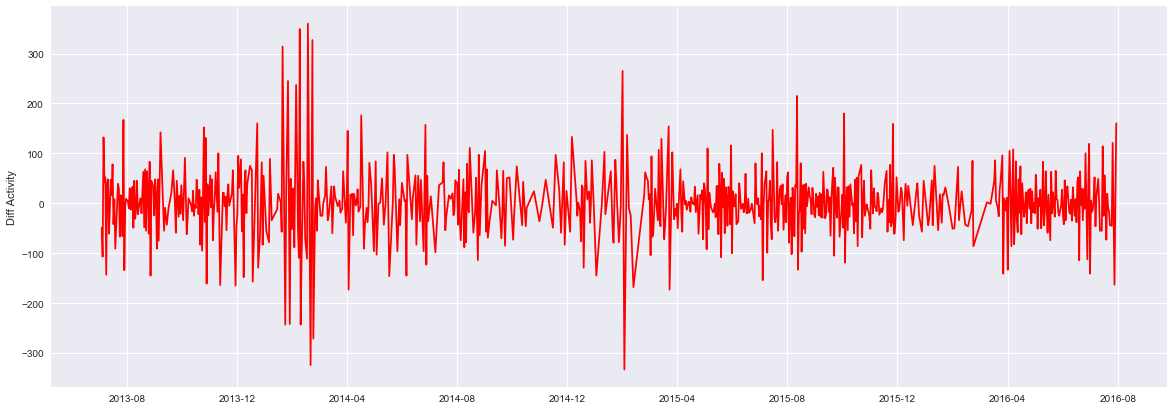

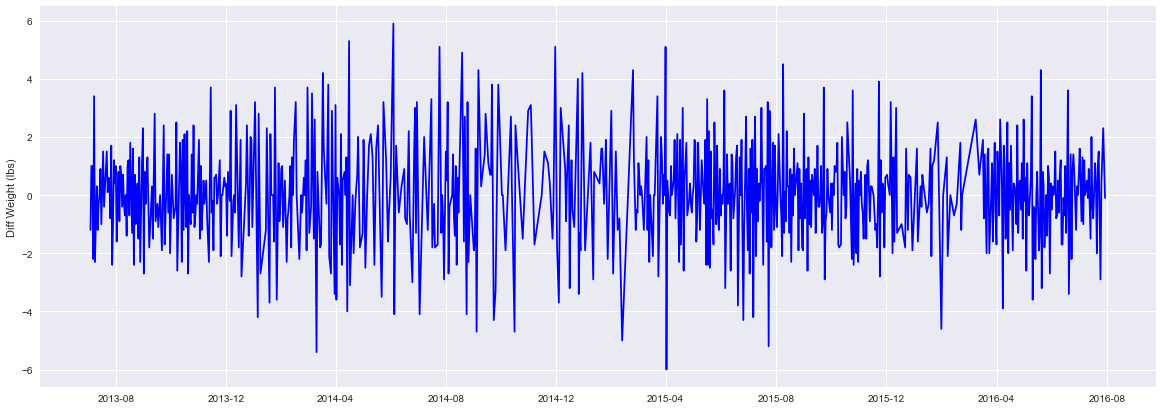

In [108]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_active.index,df_weight_active['Diff Activity'],'r')
plt.ylabel('Diff Activity')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_active.index,df_weight_active['Diff Weight'],'b')
plt.ylabel('Diff Weight (lbs)')

In [109]:
df_act_diffs = pd.concat([df_weight_active['Diff Weight'].loc['2013-07-04':] 
                      ,df_weight_active['Diff Activity'].loc['2013-07-04':]],axis=1)

In [111]:
diff_act_model = VAR(df_act_diffs)

In [115]:
diff_act_model.select_order(10)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0         9.618        9.630    1.503e+04        9.622
1         9.145        9.182        9372.        9.159
2         9.011        9.071        8192.        9.034
3         8.966       9.050*        7830.        8.998
4         8.946        9.055        7680.        8.988
5         8.938        9.071        7619.        8.990
6         8.922        9.079        7492.        8.982
7         8.907        9.088        7382.        8.977
8         8.909        9.115        7401.        8.988
9        8.879*        9.109       7178.*       8.967*
10        8.883        9.137        7211.        8.981
* Minimum



{'aic': 9, 'bic': 3, 'fpe': 9, 'hqic': 9}

In [116]:
model_act = diff_act_model.fit(3)

In [117]:
model_act.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Jan, 2018
Time:                     14:52:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.05103
Nobs:                     775.000    HQIC:                   8.99932
Log likelihood:          -5660.06    FPE:                    7839.88
AIC:                      8.96698    Det(Omega_mle):         7700.15
--------------------------------------------------------------------
Results for equation Diff Weight
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.069990         0.056106            1.247           0.213
L1.Diff Weight          -0.552317         0.035848          -15.407           0.000
L1.Diff Activity        -0.001474         

In [120]:
model_act.test_causality('Diff Weight', 'Diff Activity', kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         1.412057         2.610696            0.238  (3, 1536)
H_0: ['Diff Activity'] do not Granger-cause Diff Weight
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 2.6106956620447983,
 'df': (3, 1536),
 'pvalue': 0.23750561831103706,
 'signif': 0.05,
 'statistic': 1.4120568586508213}

In [122]:
df_diffs_total = pd.concat([df_weight_active['Diff Weight'],df_weight_active['Diff Activity'], total_calories_weight['Diff Excess']], axis=1)

In [124]:
df_diffs_total = df_diffs_total.dropna()

In [125]:
model_total = VAR(df_diffs_total)

In [127]:
model_total.select_order(10)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0         14.17        14.19    1.432e+06        14.18
1         13.71        13.78    9.006e+05        13.74
2         13.57       13.70*    7.843e+05        13.62
3         13.53        13.71    7.534e+05       13.60*
4         13.51        13.75    7.389e+05        13.60
5         13.51        13.80    7.368e+05        13.62
6         13.50        13.85    7.315e+05        13.64
7         13.50        13.90    7.292e+05        13.65
8         13.51        13.97    7.381e+05        13.69
9        13.49*        14.00   7.246e+05*        13.69
10        13.51        14.07    7.359e+05        13.73
* Minimum



{'aic': 9, 'bic': 2, 'fpe': 9, 'hqic': 3}

In [129]:
results_tot = model_total.fit(2)

In [131]:
results_tot.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Jan, 2018
Time:                     15:18:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.6919
Nobs:                     776.000    HQIC:                   13.6144
Log likelihood:          -8545.88    FPE:                    779141.
AIC:                      13.5659    Det(Omega_mle):         758431.
--------------------------------------------------------------------
Results for equation Diff Weight
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.058331         0.056713            1.029           0.304
L1.Diff Weight          -0.513260         0.044346          -11.574           0.000
L1.Diff Activity        -0.004471         

In [133]:
results_tot.test_causality('Diff Weight', ['Diff Activity','Diff Excess'], kind='f')

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         0.632240         2.375785            0.640  (4, 2307)
H_0: ['Diff Activity', 'Diff Excess'] do not Granger-cause Diff Weight
Conclusion: fail to reject H_0 at 5.00% significance level


{'conclusion': 'fail to reject',
 'crit_value': 2.3757849787029661,
 'df': (4, 2307),
 'pvalue': 0.63950961339308876,
 'signif': 0.05,
 'statistic': 0.63223973259673616}

# Some analysis of sleep data, how it compares with weight, calorie and activity levels 

In [15]:
sleep_min_2013 = pd.DataFrame(fit_data_0['sleep-minutes']['2013']['sleep-minutesAsleep'])
sleep_min_2013['dateTime'] = pd.to_datetime(sleep_min_2013['dateTime'])
sleep_min_2013.columns = ['date','Sleep_Minutes']
sleep_min_2014 = pd.DataFrame(fit_data_0['sleep-minutes']['2014']['sleep-minutesAsleep'])
sleep_min_2014['dateTime'] = pd.to_datetime(sleep_min_2014['dateTime'])
sleep_min_2014.columns = ['date','Sleep_Minutes']
sleep_min_2015 = pd.DataFrame(fit_data_0['sleep-minutes']['2015']['sleep-minutesAsleep'])
sleep_min_2015['dateTime'] = pd.to_datetime(sleep_min_2015['dateTime'])
sleep_min_2015.columns = ['date','Sleep_Minutes']
sleep_min_2016 = pd.DataFrame(fit_data_0['sleep-minutes']['2016']['sleep-minutesAsleep'])
sleep_min_2016['dateTime'] = pd.to_datetime(sleep_min_2016['dateTime'])
sleep_min_2016.columns = ['date','Sleep_Minutes']

In [16]:
sleep_min_total = pd.concat([sleep_min_2013,sleep_min_2014,sleep_min_2015,sleep_min_2016])
sleep_min_total = sleep_min_total.reset_index(drop=True)
sleep_min_total = sleep_min_total[183:1300]
sleep_min_total = sleep_min_total.set_index('date')
sleep_min_total['Sleep_Minutes'] = sleep_min_total['Sleep_Minutes'].astype('int')

In [17]:
sleep_min_total['Mod_Sleep_Min'] = sleep_min_total['Sleep_Minutes'].replace(0,sleep_min_total['Sleep_Minutes'].mean())
sleep_min_total['Rolling Avg Sleep'] = sleep_min_total['Mod_Sleep_Min'].rolling(window=7).mean()

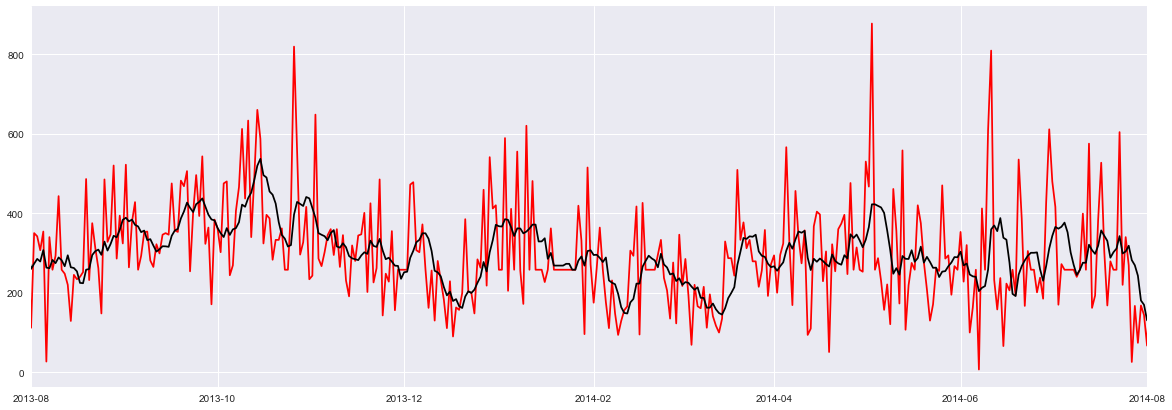

In [18]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(sleep_min_total.index,sleep_min_total['Mod_Sleep_Min'],'r')
plot2 = ax1.plot(sleep_min_total.index,sleep_min_total['Rolling Avg Sleep'],'black')
plt.xlim('2013-08-01','2014-08-01')
plt.show()

In [19]:
len(sleep_min_total['Mod_Sleep_Min'])


1117

In [37]:
min_active_total_2 = min_active_total.reset_index(drop=True)
min_active_total_2 = min_active_total_2[183:1300]
min_active_total_2['Mod_Total_minutes'] = min_active_total_2['Total_minutes'].replace(0,min_active_total_2['Total_minutes'].mean())

In [44]:
type(min_active_total_2['Mod_Total_minutes'].loc[183])

numpy.float64

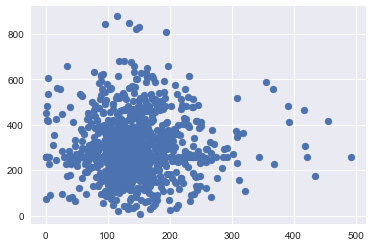

In [49]:
plt.scatter(min_active_total_2['Mod_Total_minutes'].shift(-4),sleep_min_total['Mod_Sleep_Min'])
plt.show()

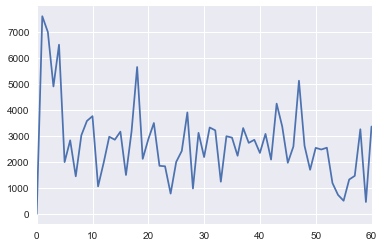

In [40]:
fft = fftpack.fft(
    sleep_min_total['Mod_Sleep_Min'].loc['2013-08-01':'2014-08-01']
    -sleep_min_total['Mod_Sleep_Min'].loc['2013-08-01':'2014-08-01'].mean())
plt.plot(np.abs(fft))
plt.xlim(0,60)
plt.show()

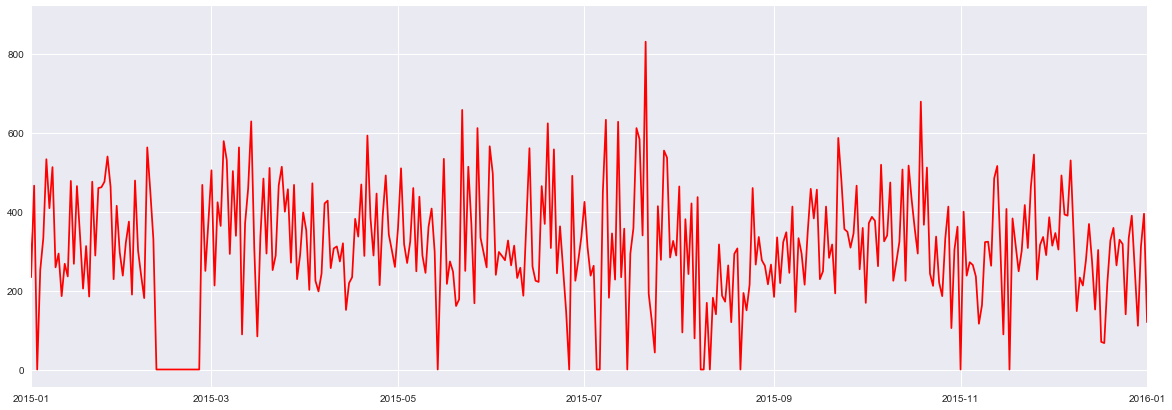

In [154]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(sleep_min_total.index,sleep_min_total['Sleep_Minutes'],'r')
plt.xlim('2015-01-01','2016-01-01')
plt.show()

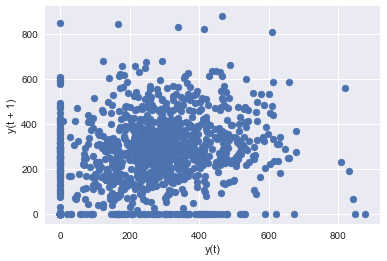

In [118]:
lag_plot(sleep_min_total['Sleep_Minutes'])
plt.show()

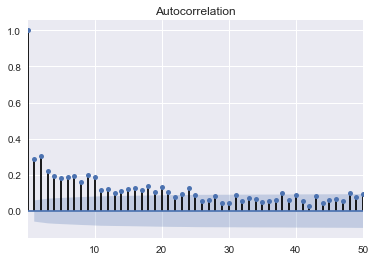

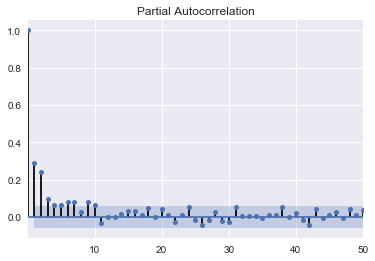

In [123]:
plot_acf(sleep_min_total['Sleep_Minutes'].astype('float'), lags=50)
plt.xlim(0.1,50)
plot_pacf(sleep_min_total['Sleep_Minutes'].astype('float'), lags=50)
plt.xlim(0.1,50)
plt.show()

In [124]:
test_sleep = adfuller(sleep_min_total['Sleep_Minutes'].astype('float'))           
print('ADF Statistic Excess: %f' % test_sleep[0])                            #Sleep is a stationary series 
print('p-value Excess: %f' % test_sleep[1])

ADF Statistic Excess: -6.072244
p-value Excess: 0.000000


In [131]:
sleep_mod01 = ARMA(sleep_min_total['Sleep_Minutes'].astype('float'), (1,1)).fit()
print(sleep_mod01.params)

const                  258.385219
ar.L1.Sleep_Minutes      0.932269
ma.L1.Sleep_Minutes     -0.774933
dtype: float64


In [132]:
print(sleep_mod01.aic, sleep_mod01.bic, sleep_mod01.hqic)

14428.043654904337 14448.1172621 14435.6319391


In [133]:
sm.stats.durbin_watson(sleep_mod01.resid.values)

1.9801396494654391

In [134]:
sleep_excess= sleep_mod01.resid
stats.normaltest(sleep_excess)

NormaltestResult(statistic=40.573662505828558, pvalue=1.5471810288376457e-09)

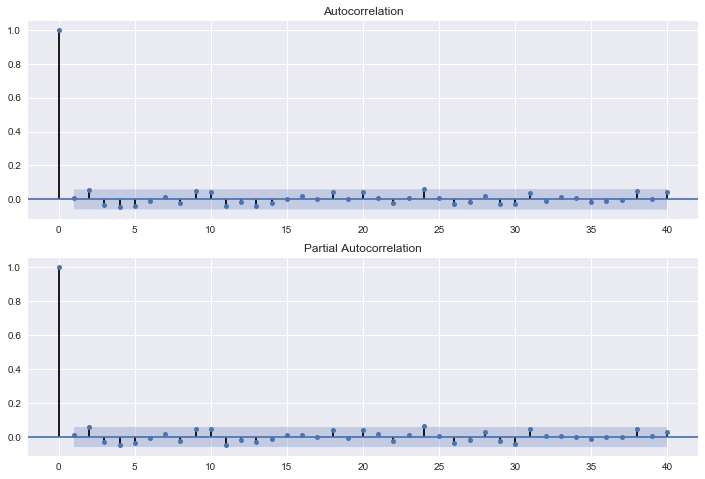

In [135]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sleep_excess.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sleep_excess, lags=40, ax=ax2)

In [136]:
r,q,p = sm.tsa.acf(sleep_excess.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.008346   0.078016  0.780005
2.0   0.056515   3.658462  0.160537
3.0  -0.031370   4.762632  0.190027
4.0  -0.044989   7.035614  0.134018
5.0  -0.039033   8.748143  0.119542
6.0  -0.009836   8.856981  0.181783
7.0   0.012984   9.046807  0.249313
8.0  -0.019362   9.469348  0.304261
9.0   0.049448  12.227594  0.200781
10.0  0.046252  14.643026  0.145629
11.0 -0.039008  16.362669  0.128192
12.0 -0.017837  16.722564  0.160335
13.0 -0.038360  18.388561  0.143315
14.0 -0.021250  18.900249  0.168796
15.0  0.004659  18.924873  0.217158
16.0  0.017322  19.265504  0.255136
17.0  0.002320  19.271622  0.313166
18.0  0.042549  21.330619  0.263062
19.0  0.001732  21.334033  0.318641
20.0  0.042888  23.429841  0.268184
21.0  0.009779  23.538889  0.315932
22.0 -0.022389  24.111078  0.341434
23.0  0.005624  24.147217  0.395694
24.0  0.058364  28.042610  0.258247
25.0  0.008496  28.125239  0.302120
26.0 -0.026228  28.913354  0

In [137]:
df_weight_sleep = pd.concat([sleep_min_total,df_weight_red_date],axis=1)
df_weight_sleep = df_weight_sleep.dropna()

In [138]:
#Rolling Average for Sleep Minutes and for Weight

df_weight_sleep['Rolling Avg Sleep'] = df_weight_sleep['Sleep_Minutes'].rolling(window=7).mean()
df_weight_sleep['Rolling Avg Weight'] = df_weight_sleep['weight'].rolling(window=7).mean()

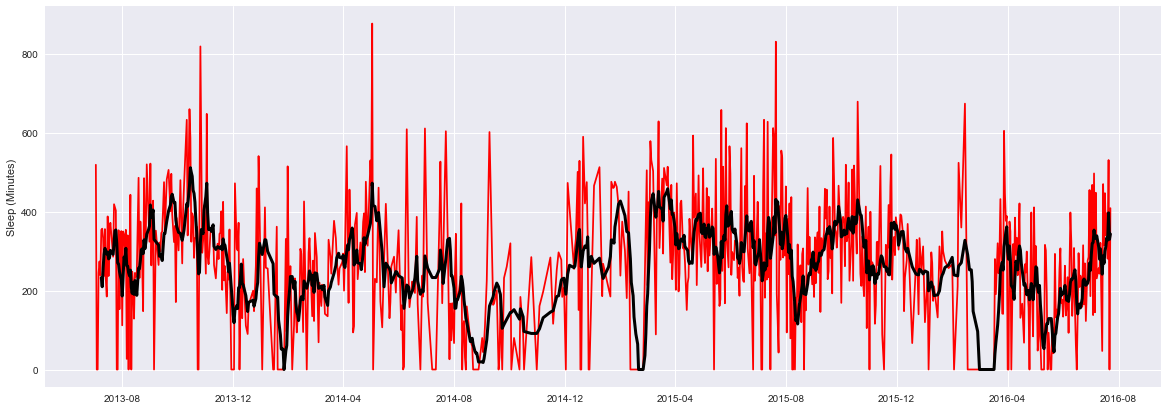

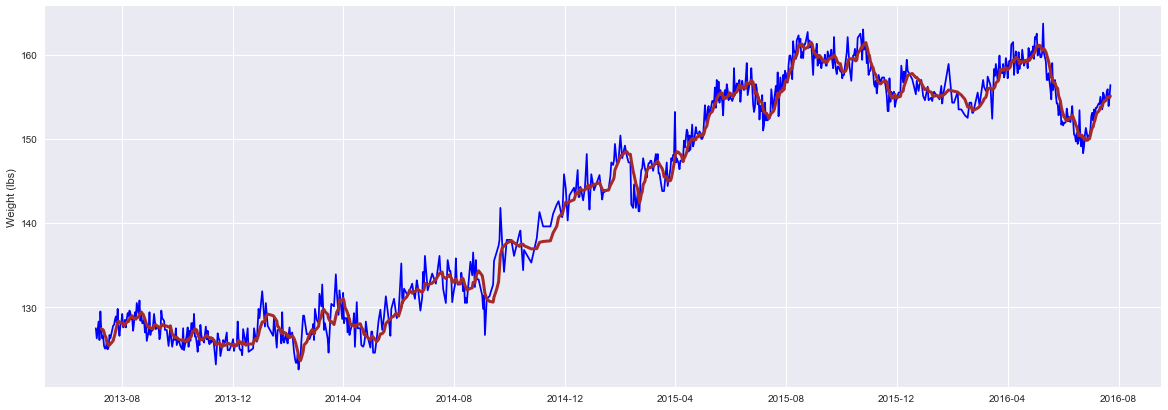

In [139]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Sleep_Minutes'],'r')
plot2 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Sleep'], 'black',linewidth=3.0)
plt.ylabel('Sleep (Minutes)')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep.index,df_weight_sleep['weight'],'b')
plot4 = ax2.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')

In [140]:
df_weight_sleep['Diff Weight'] = df_weight_sleep['weight'].diff()

In [143]:
df_weight_sleep['Sleep_Minutes'] = df_weight_sleep['Sleep_Minutes'].astype('float')

In [145]:
for i in range(-14,15,1):
    print('shift day:', i, df_weight_sleep['Diff Weight'].corr(df_weight_sleep['Sleep_Minutes'].shift(i)))

shift day: -14 -0.0258195970748
shift day: -13 -0.00691663563267
shift day: -12 -0.0351508406046
shift day: -11 0.0462497215339
shift day: -10 -0.0133665184182
shift day: -9 0.036794482056
shift day: -8 0.0372859362761
shift day: -7 -0.0276882462165
shift day: -6 0.0186577562151
shift day: -5 -0.0200055673042
shift day: -4 0.0201826407736
shift day: -3 0.00511529402356
shift day: -2 -0.0309294407554
shift day: -1 0.0709433327503
shift day: 0 0.0033183155489
shift day: 1 0.0445551969214
shift day: 2 -0.00385692177109
shift day: 3 -0.0697440339176
shift day: 4 0.0573501853992
shift day: 5 -0.0175643394375
shift day: 6 -0.000750562512081
shift day: 7 -0.0624050844322
shift day: 8 0.0223886540748
shift day: 9 0.0113866438557
shift day: 10 -0.016927041419
shift day: 11 -0.00107200731053
shift day: 12 0.0244998018255
shift day: 13 -0.0298599500302
shift day: 14 -0.0260486031627


In [ ]:
for i in range(-7,8,1):
    print('shift day:', i, df_weight_sleep['Rolling Avg Weight'].corr(df_weight_sleep['Rolling Avg Sleep'].shift(i)))

In [147]:
df_calories_sleep = pd.concat([total_calories_new,sleep_min_total], axis=1)

In [152]:
df_calories_sleep = df_calories_sleep.dropna()
df_calories_sleep

Tracker_Act_Calories  Tracker_Calories     Ratio  Excess  \
date                                                                   
2013-07-03                   530              1821  0.291049    1291   
2013-07-04                   367              1703  0.215502    1336   
2013-07-05                    55              1501  0.036642    1446   
2013-07-06                   473              1791  0.264098    1318   
2013-07-07                   542              1807  0.299945    1265   
2013-07-08                   716              1941  0.368882    1225   
2013-07-09                   289              1650  0.175152    1361   
2013-07-10                   411              1728  0.237847    1317   
2013-07-11                   569              1838  0.309576    1269   
2013-07-12                   368              1694  0.217237    1326   
2013-07-13                   328              1666  0.196879    1338   
2013-07-14                   471              1759  0.267766    1288   
2013-07-15                   517              1798  0.287542    1281   
2013-07-16                   723              1916  0.377349    1193   
2013-07-17                   680              1916  0.354906    1236   
2013-07-18                   834              2068  0.403288    1234   
2013-07-19                   368              1693  0.217366    1325   
2013-07-20                   656              1884  0.348195    1228   
2013-07-21                   639              1887  0.338633    1248   
2013-07-22                   498              1789  0.278368    1291   
2013-07-23                   550              1812  0.303532    1262   
2013-07-24                   390              1723  0.226349    1333   
2013-07-25                   425              1743  0.243832    1318   
2013-07-26                   424              1741  0.243538    1317   
2013-07-27                   239              1630  0.146626    1391   
2013-07-28                   732              1943  0.376737    1211   
2013-07-29                   327              1671  0.195691    1344   
2013-07-30                   323              1677  0.192606    1354   
2013-07-31                   367              1713  0.214244    1346   
2013-08-01                   357              1701  0.209877    1344   
...                          ...               ...       ...     ...   
2016-06-24                   407              1816  0.224119    1409   
2016-06-25                   360              1787  0.201455    1427   
2016-06-26                   719              2041  0.352278    1322   
2016-06-27                   366              1802  0.203108    1436   
2016-06-28                   336              1774  0.189402    1438   
2016-06-29                   447              1850  0.241622    1403   
2016-06-30                   759              2035  0.372973    1276   
2016-07-01                   364              1794  0.202899    1430   
2016-07-02                   384              1816  0.211454    1432   
2016-07-03                   321              1766  0.181767    1445   
2016-07-04                   286              1748  0.163616    1462   
2016-07-05                   331              1789  0.185020    1458   
2016-07-06                   491              1888  0.260064    1397   
2016-07-07                   350              1802  0.194229    1452   
2016-07-08                   383              1821  0.210324    1438   
2016-07-09                   303              1769  0.171283    1466   
2016-07-10                   538              1924  0.279626    1386   
2016-07-11                   566              1950  0.290256    1384   
2016-07-12                   390              1838  0.212187    1448   
2016-07-13                   494              1901  0.259863    1407   
2016-07-14                   199              1701  0.116990    1502   
2016-07-15                   593              1978  0.299798    1385   
2016-07-16                   485              1896  

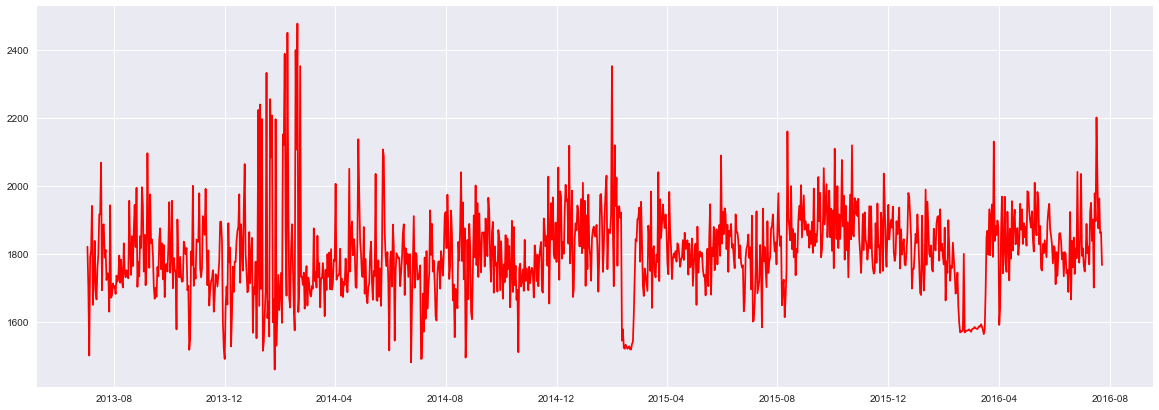

In [151]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_calories_sleep.index,df_calories_sleep['Tracker_Calories'],'r')

In [155]:
df_active_sleep = pd.concat([min_active_total_date,sleep_min_total],axis=1)

In [159]:
df_active_sleep = df_active_sleep.drop('Percent Very Active', axis=1)

In [165]:
df_active_sleep = df_active_sleep.dropna()


In [173]:
df_active_sleep['Sleep_Minutes'] = df_active_sleep['Sleep_Minutes'].astype('float')

In [174]:
df_active_sleep['Sleep_Minutes'].mean()

257.905102954342

In [175]:
df_active_sleep['Sleep_Minutes'] = df_active_sleep['Sleep_Minutes'].replace(0,df_active_sleep['Sleep_Minutes'].mean())

In [182]:
df_active_sleep['light_minutes'] = df_active_sleep['light_minutes'].replace(0,df_active_sleep['light_minutes'].mean())

In [ ]:
#create a column with good, average, and bad night of sleep

In [186]:
df_active_sleep['Good Night'] = df_active_sleep['Sleep_Minutes'].map(lambda x : 1 if x > 400 else 0)
df_active_sleep['Average Night'] = df_active_sleep['Sleep_Minutes'].map(lambda x : 1 if 200 < x < 400 else 0)
df_active_sleep['Bad Night'] = df_active_sleep['Sleep_Minutes'].map(lambda x : 1 if x < 200 else 0)

In [189]:
sleep_min_arr = np.array(df_active_sleep['Total_minutes'].values)  #the features "y" value array

In [192]:
night_cat_arr= np.array(df_active_sleep[['Good Night', 'Average Night', 'Bad Night']].values)   #the X values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn import utils
from sklearn import ensemble

In [ ]:
indices = np.random.permutation(range(len(night_cat_arr)))

In [ ]:
X_shuff, y_shuff = night_cat_arr[indices], sleep_min_arr[indices]

# Now look at sleep efficiency data 

In [65]:
sleep_eff_2013 = pd.DataFrame(fit_data_0['sleep-efficiency']['2013']['sleep-efficiency'])
sleep_eff_2013['dateTime'] = pd.to_datetime(sleep_eff_2013['dateTime'])
sleep_eff_2013.columns = ['date','sleep_eff']
sleep_eff_2014 = pd.DataFrame(fit_data_0['sleep-efficiency']['2014']['sleep-efficiency'])
sleep_eff_2014['dateTime'] = pd.to_datetime(sleep_eff_2014['dateTime'])
sleep_eff_2014.columns = ['date','sleep_eff']
sleep_eff_2015 = pd.DataFrame(fit_data_0['sleep-efficiency']['2015']['sleep-efficiency'])
sleep_eff_2015['dateTime'] = pd.to_datetime(sleep_eff_2015['dateTime'])
sleep_eff_2015.columns = ['date','sleep_eff']
sleep_eff_2016 = pd.DataFrame(fit_data_0['sleep-efficiency']['2016']['sleep-efficiency'])
sleep_eff_2016['dateTime'] = pd.to_datetime(sleep_eff_2016['dateTime'])
sleep_eff_2016.columns = ['date','sleep_eff']

In [66]:
sleep_eff_total = pd.concat([sleep_eff_2013,sleep_eff_2014,sleep_eff_2015,sleep_eff_2016])


In [67]:
sleep_eff_total = sleep_eff_total.reset_index(drop=True)
sleep_eff_total = sleep_eff_total[183:1300]
sleep_eff_total = sleep_eff_total.set_index('date')



In [68]:
df_weight_sleep_eff = pd.concat([sleep_eff_total,df_weight_red_date],axis=1)
df_weight_sleep_eff = df_weight_sleep_eff.dropna()

In [69]:
#Data is noisy, look at 30 day rolling average

df_weight_sleep_eff['Rolling Avg Sleep Eff'] = df_weight_sleep_eff['sleep_eff'].rolling(window=30).mean()
df_weight_sleep_eff['Rolling Avg Weight'] = df_weight_sleep_eff['weight'].rolling(window=30).mean()

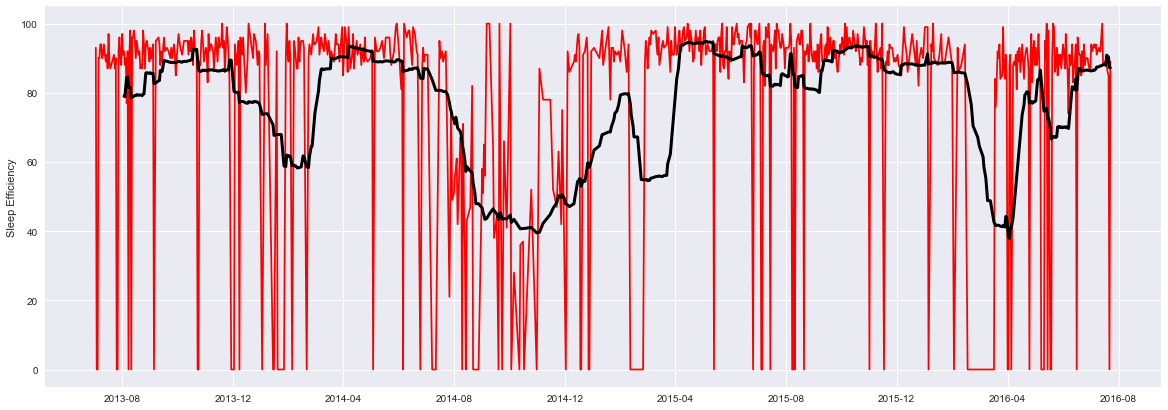

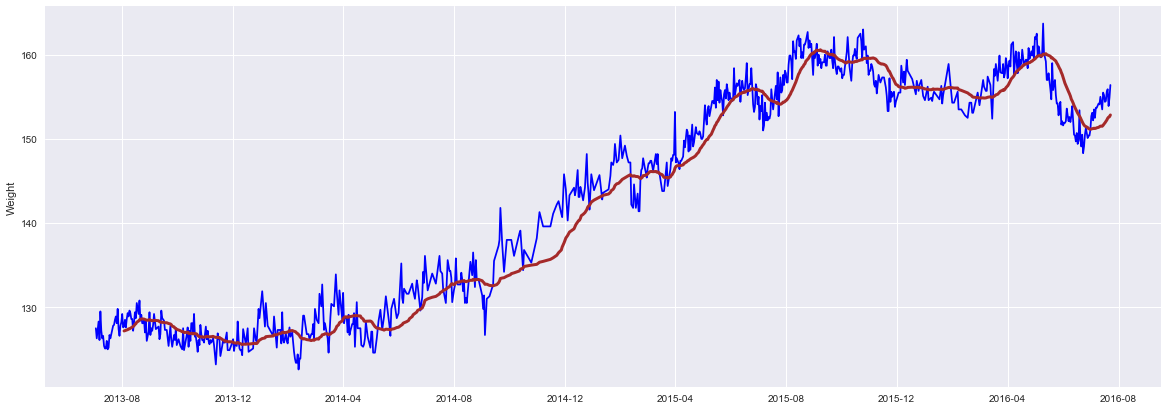

In [70]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['sleep_eff'],'r')
plot2 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Sleep Eff'], 'black',linewidth=3.0)
plt.ylabel('Sleep Efficiency')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['weight'],'b')
plot4 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight')

In [71]:
for i in range(-7,7,1):
    print('shift day:', i, df_weight_sleep_eff['Rolling Avg Weight'].corr(df_weight_sleep_eff['Rolling Avg Sleep Eff'].shift(i)))

shift day: -7 0.129544800074
shift day: -6 0.12785742796
shift day: -5 0.126132203501
shift day: -4 0.124035110964
shift day: -3 0.121894076323
shift day: -2 0.119993555327
shift day: -1 0.118413965937
shift day: 0 0.116730738098
shift day: 1 0.114686339824
shift day: 2 0.112529510758
shift day: 3 0.110136098455
shift day: 4 0.107650284295
shift day: 5 0.105065107983
shift day: 6 0.102545250005


# Older Material below:
    

In [20]:
df_weight = df_weight.set_index('date')
df_weight = df_weight.drop(['logId','source','time'],axis=1)



In [21]:
df_weight_fat = df_weight['fat'].dropna()


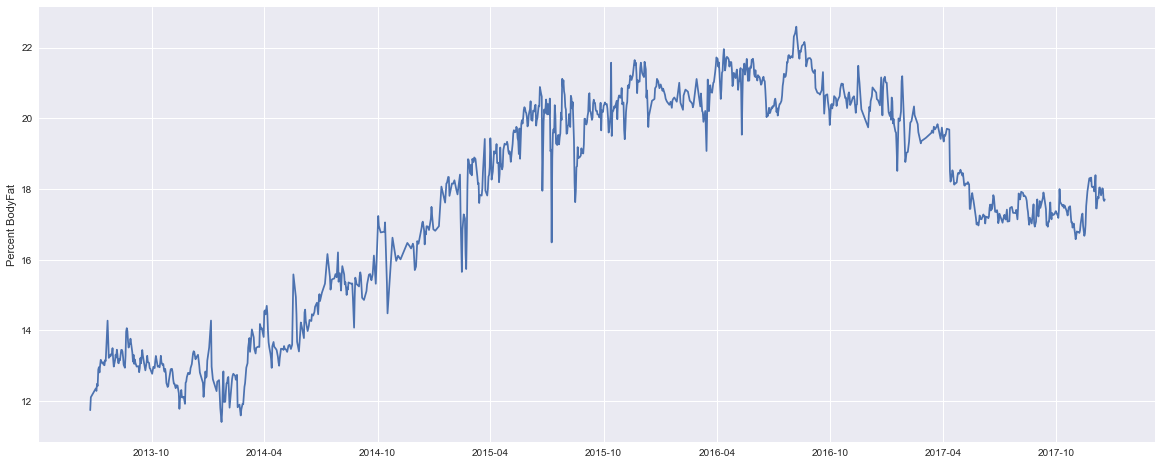

In [22]:
plt.figure(1,figsize=(20,8))
plt.plot(df_weight_fat.index,df_weight_fat)
plt.ylabel('Percent BodyFat')
plt.show()

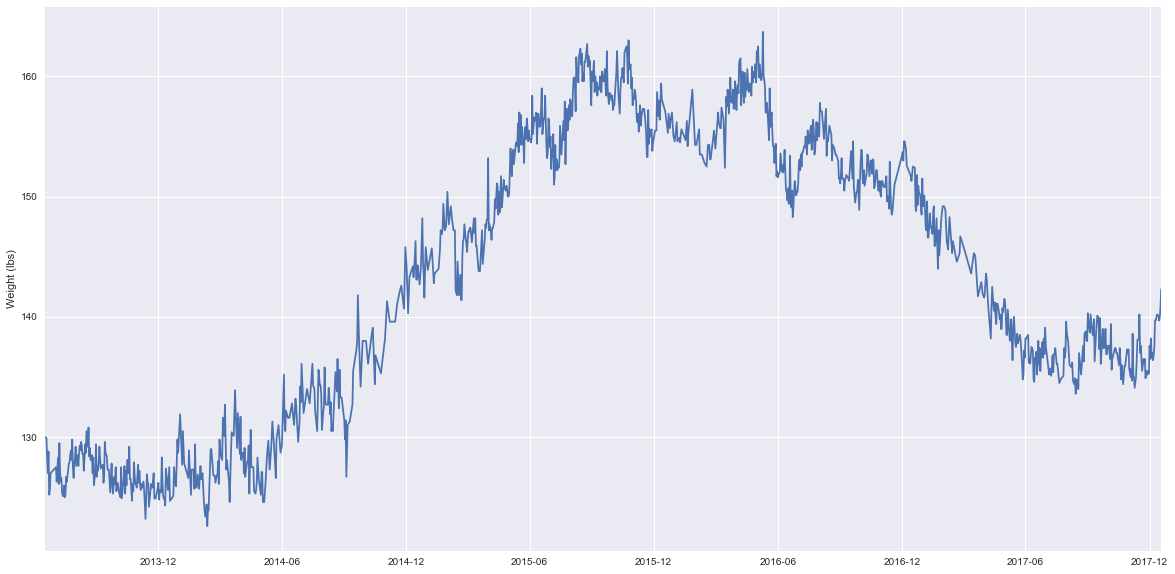

In [23]:
plt.figure(1,figsize=(20,10))
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
plt.xlim('2013-06-17', '2017-12-18')
plt.show()

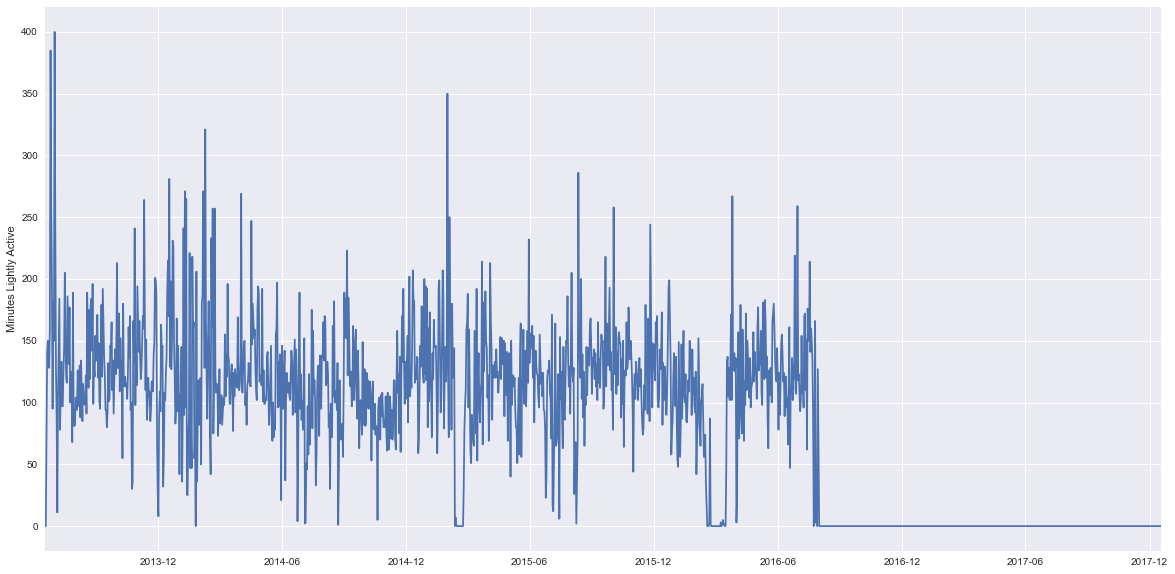

In [24]:
plt.figure(1,figsize=(20,10))
plt.plot(min_light_active.index,min_light_active['light_minutes'])
plt.xlim('2013-06-17', '2017-12-18')
plt.ylabel('Minutes Lightly Active')
plt.show()

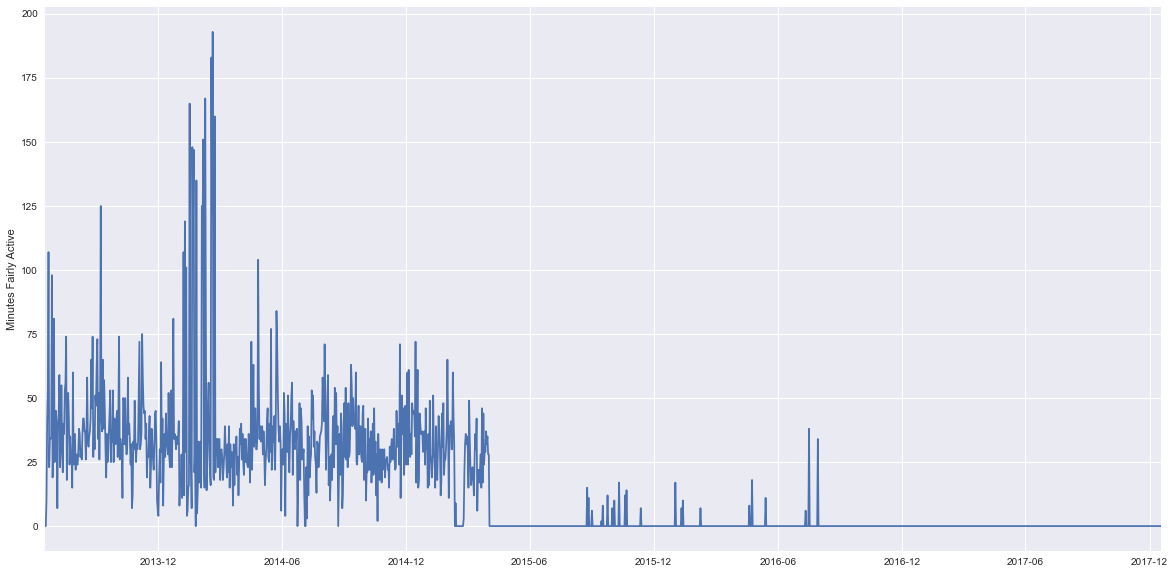

In [25]:
plt.figure(1,figsize=(20,10))
plt.plot(min_fairly_active.index,min_fairly_active['fair_minutes'])
plt.ylabel('Minutes Fairly Active')
plt.xlim('2013-06-17', '2017-12-18')
plt.show()

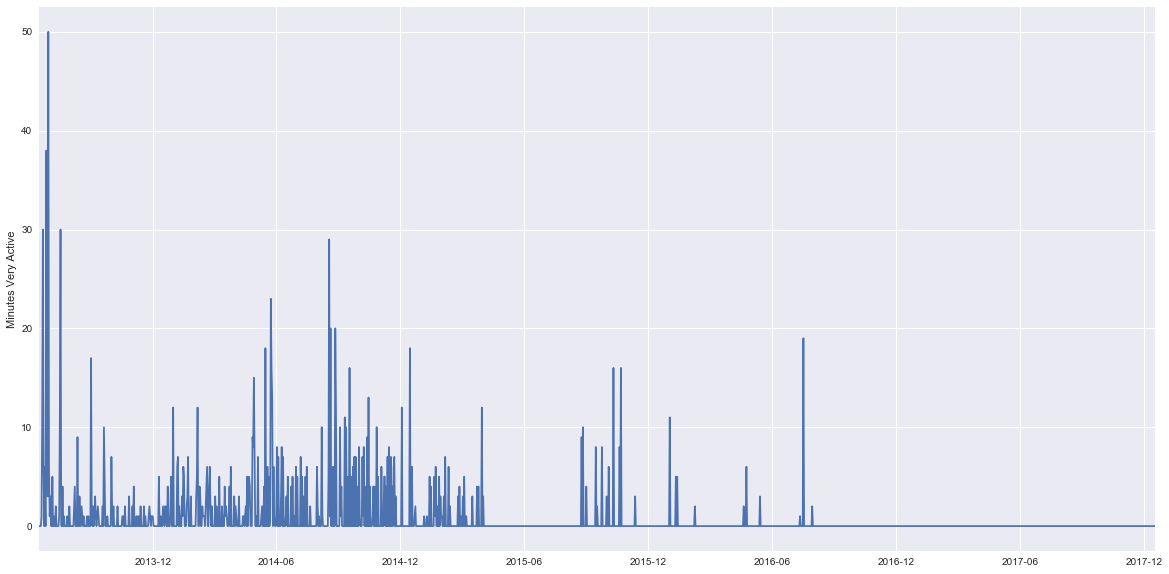

In [26]:
plt.figure(1,figsize=(20,10))
plt.plot(min_very_active.index,min_very_active['very_minutes'])
plt.ylabel('Minutes Very Active')
plt.xlim('2013-06-17', '2017-12-18')
plt.show()

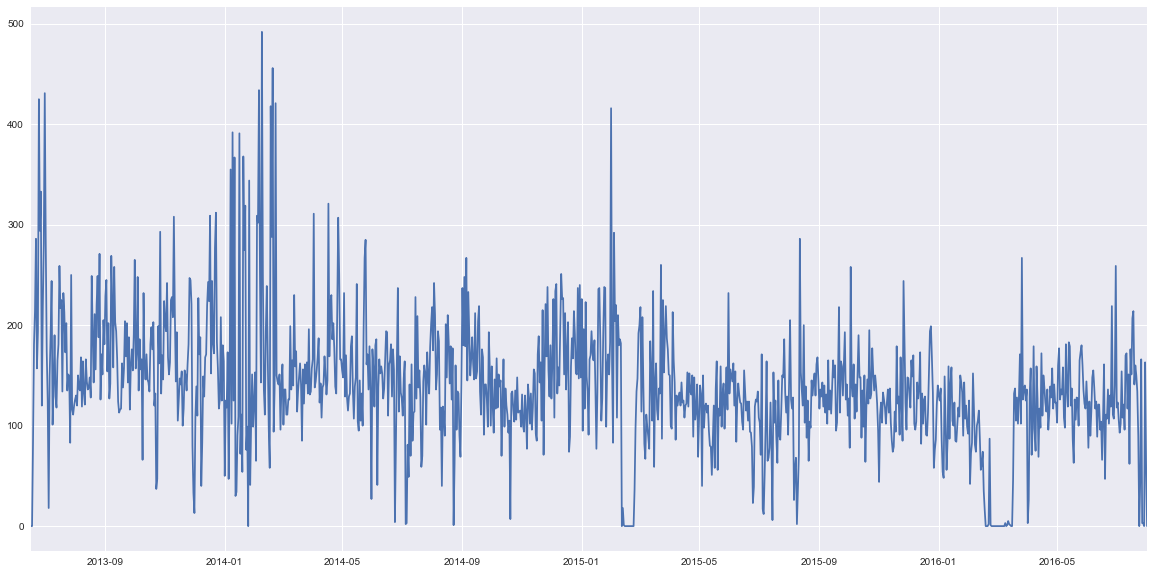

In [28]:
plt.figure(1,figsize=(20,10))
plt.plot(min_active_total.index,min_active_total['Total_minutes'])
plt.xlim('2013-06-17', '2016-08-01')
plt.show()

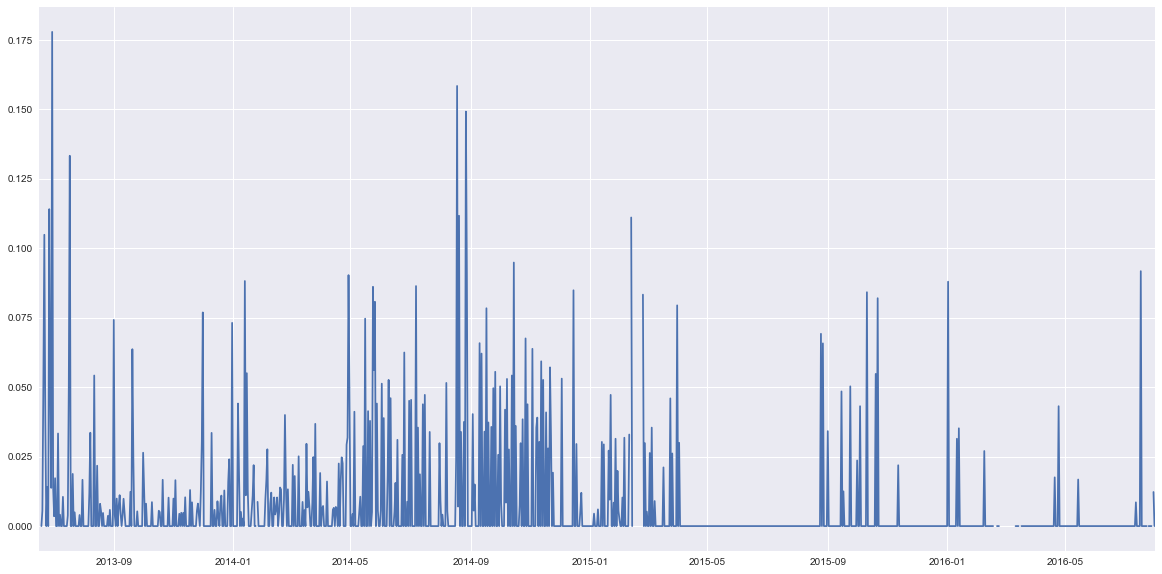

In [29]:
plt.figure(1,figsize=(20,10))
plt.plot(min_active_total.index,min_active_total['Percent Very Active'])
plt.xlim('2013-06-17', '2016-08-01')
plt.show()

In [34]:
tracker_steps_2013 = pd.DataFrame(fit_data_0['tracker-steps']['2013']['activities-tracker-steps'])
tracker_steps_2013['dateTime'] = pd.to_datetime(tracker_steps_2013['dateTime'])
tracker_steps_2013.columns = ['date','tracker-steps']
tracker_steps_2014 = pd.DataFrame(fit_data_0['tracker-steps']['2014']['activities-tracker-steps'])
tracker_steps_2014['dateTime'] = pd.to_datetime(tracker_steps_2014['dateTime'])
tracker_steps_2014.columns = ['date','tracker-steps']
tracker_steps_2015 = pd.DataFrame(fit_data_0['tracker-steps']['2015']['activities-tracker-steps'])
tracker_steps_2015['dateTime'] = pd.to_datetime(tracker_steps_2015['dateTime'])
tracker_steps_2015.columns = ['date','tracker-steps']
tracker_steps_2016 = pd.DataFrame(fit_data_0['tracker-steps']['2016']['activities-tracker-steps'])
tracker_steps_2016['dateTime'] = pd.to_datetime(tracker_steps_2016['dateTime'])
tracker_steps_2016.columns = ['date','tracker-steps']
tracker_steps_2017 = pd.DataFrame(fit_data_0['tracker-steps']['2017']['activities-tracker-steps'])
tracker_steps_2017['dateTime'] = pd.to_datetime(tracker_steps_2017['dateTime'])
tracker_steps_2017.columns = ['date','tracker-steps']

In [35]:
tracker_steps = pd.concat([tracker_steps_2013,tracker_steps_2014,tracker_steps_2015,tracker_steps_2016,tracker_steps_2017])
tracker_steps['tracker-steps'] = tracker_steps['tracker-steps'].astype(int)
tracker_steps = tracker_steps.set_index('date')

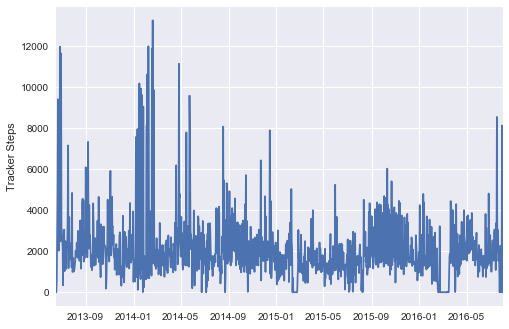

In [36]:
plt.plot(tracker_steps.index,tracker_steps['tracker-steps'])
plt.xlim('2013-06-18', '2016-08-01')
plt.ylabel('Tracker Steps')
plt.show()

In [37]:
tracker_floors_2013 = pd.DataFrame(fit_data_0['tracker-floors']['2013']['activities-tracker-floors'])
tracker_floors_2013['dateTime'] = pd.to_datetime(tracker_floors_2013['dateTime'])
tracker_floors_2013.columns = ['date','tracker-floors']
tracker_floors_2014 = pd.DataFrame(fit_data_0['tracker-floors']['2014']['activities-tracker-floors'])
tracker_floors_2014['dateTime'] = pd.to_datetime(tracker_floors_2014['dateTime'])
tracker_floors_2014.columns = ['date','tracker-floors']
tracker_floors_2015 = pd.DataFrame(fit_data_0['tracker-floors']['2015']['activities-tracker-floors'])
tracker_floors_2015['dateTime'] = pd.to_datetime(tracker_floors_2015['dateTime'])
tracker_floors_2015.columns = ['date','tracker-floors']
tracker_floors_2016 = pd.DataFrame(fit_data_0['tracker-floors']['2016']['activities-tracker-floors'])
tracker_floors_2016['dateTime'] = pd.to_datetime(tracker_floors_2016['dateTime'])
tracker_floors_2016.columns = ['date','tracker-floors']
tracker_floors_2017 = pd.DataFrame(fit_data_0['tracker-floors']['2017']['activities-tracker-floors'])
tracker_floors_2017['dateTime'] = pd.to_datetime(tracker_floors_2017['dateTime'])
tracker_floors_2017.columns = ['date','tracker-floors']

In [38]:
tracker_floors = pd.concat([tracker_floors_2013,tracker_floors_2014,tracker_floors_2015,tracker_floors_2016,tracker_floors_2017])
tracker_floors['tracker-floors'] = tracker_floors['tracker-floors'].astype(int)
tracker_floors = tracker_floors.set_index('date')

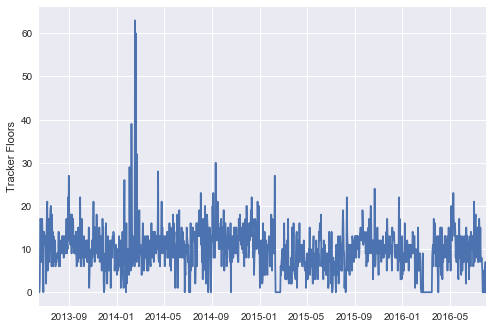

In [39]:
plt.plot(tracker_floors.index,tracker_floors['tracker-floors'])
plt.xlim('2013-06-18', '2016-08-01')
plt.ylabel('Tracker Floors')
plt.show()

In [56]:
tracker_sed_min_2013 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2013']['activities-tracker-minutesSedentary'])
tracker_sed_min_2013['dateTime'] = pd.to_datetime(tracker_sed_min_2013['dateTime'])
tracker_sed_min_2013.columns = ['date','Sed_Minutes']
tracker_sed_min_2014 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2014']['activities-tracker-minutesSedentary'])
tracker_sed_min_2014['dateTime'] = pd.to_datetime(tracker_sed_min_2014['dateTime'])
tracker_sed_min_2014.columns = ['date','Sed_Minutes']
tracker_sed_min_2015 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2015']['activities-tracker-minutesSedentary'])
tracker_sed_min_2015['dateTime'] = pd.to_datetime(tracker_sed_min_2015['dateTime'])
tracker_sed_min_2015.columns = ['date','Sed_Minutes']
tracker_sed_min_2016 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2016']['activities-tracker-minutesSedentary'])
tracker_sed_min_2016['dateTime'] = pd.to_datetime(tracker_sed_min_2016['dateTime'])
tracker_sed_min_2016.columns = ['date','Sed_Minutes']
tracker_sed_min_2017 = pd.DataFrame(fit_data_0['tracker-minutes-sedentary']['2017']['activities-tracker-minutesSedentary'])
tracker_sed_min_2017['dateTime'] = pd.to_datetime(tracker_sed_min_2017['dateTime'])
tracker_sed_min_2017.columns = ['date','Sed_Minutes']

In [57]:
tracker_sed_min = pd.concat([tracker_sed_min_2013,tracker_sed_min_2014,tracker_sed_min_2015,tracker_sed_min_2016,tracker_sed_min_2017])
tracker_sed_min['Sed_Minutes'] = tracker_sed_min['Sed_Minutes'].astype(int)
tracker_sed_min = tracker_sed_min.set_index('date')

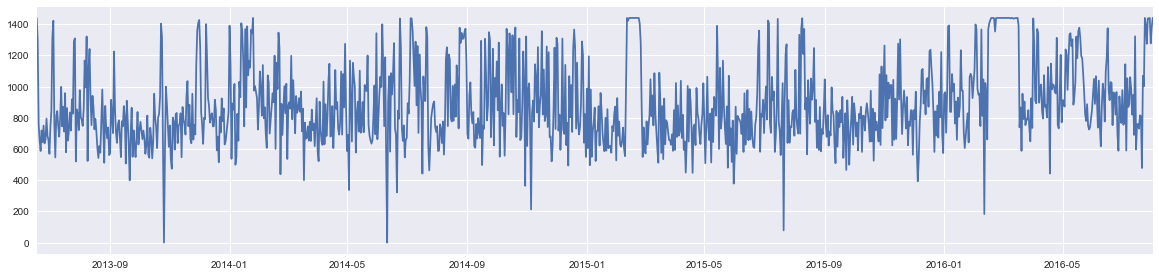

In [58]:
plt.plot(tracker_sed_min.index,tracker_sed_min['Sed_Minutes'])
plt.xlim('06-18-2013','08-01-2016')
plt.show()

In [59]:
min_active_total_new = pd.concat([min_active_total,tracker_sed_min], axis=1)

In [60]:
min_active_total_new['very/sed'] = min_active_total_new['very_minutes']/min_active_total_new['Sed_Minutes']

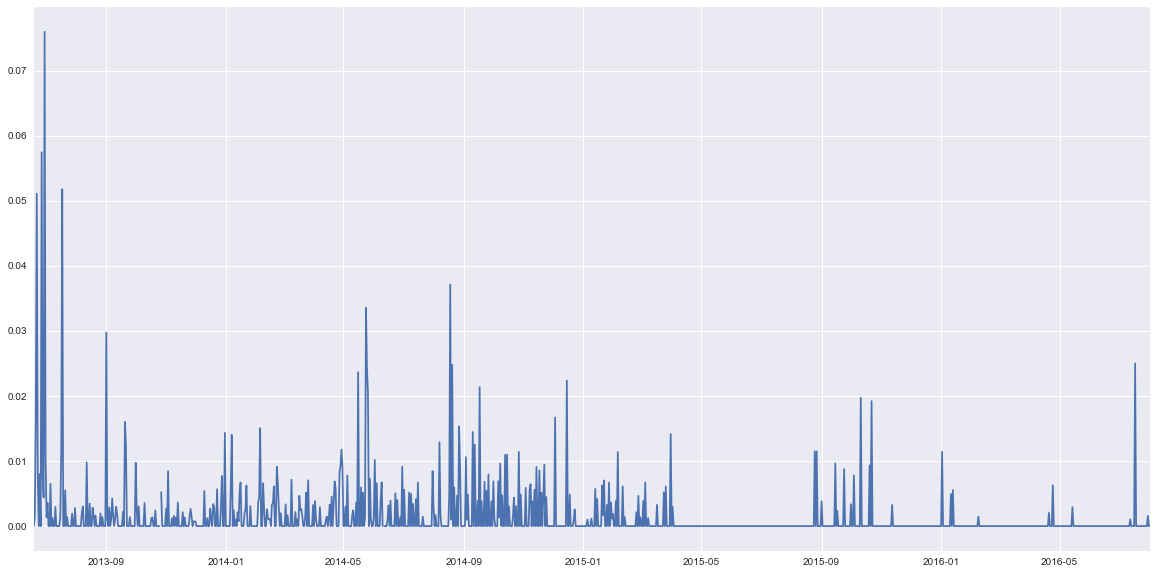

In [67]:
plt.figure(2,figsize=(20,10))
plt.plot(min_active_total_new.index,min_active_total_new['very/sed'])
plt.xlim('06-19-2013','08-01-2016')
plt.show()

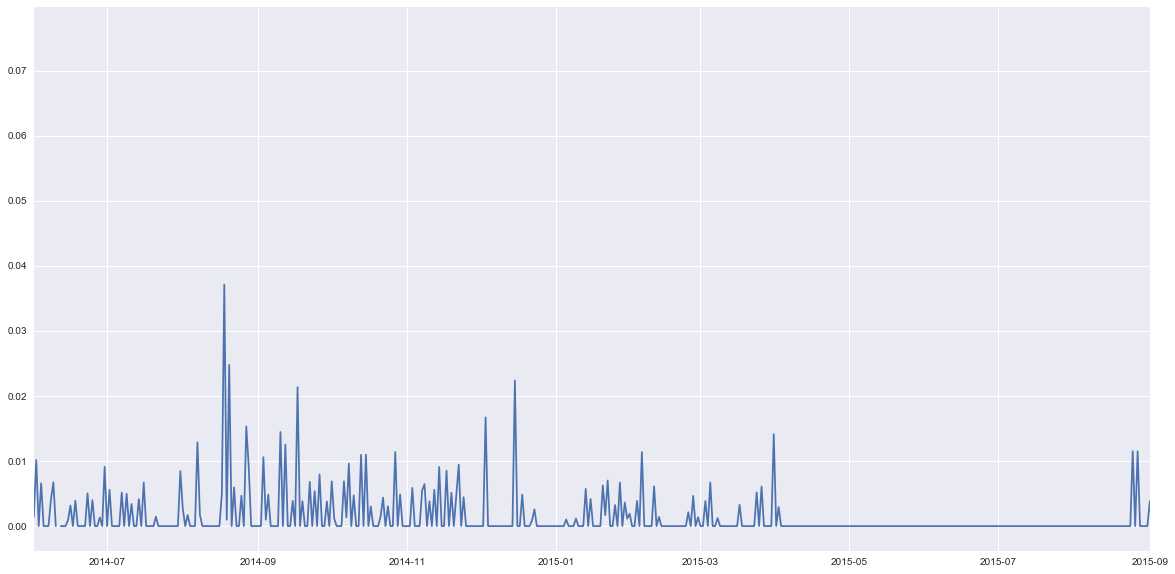

In [66]:
plt.figure(2,figsize=(20,10))
plt.plot(min_active_total_new.index,min_active_total_new['very/sed'])
plt.xlim('06-01-2014','09-01-2015')
plt.show()